In [181]:
import pandas as pd

# Cargar los archivos de datos subidos
colocacion_creditos_path = 'Colocacion_creditos.xlsx'
historico_hallazgos_path = 'Historico_hallazgos.xlsx'

# Leer los datasets
colocacion_creditos = pd.read_excel(colocacion_creditos_path)
historico_hallazgos = pd.read_excel(historico_hallazgos_path)

# Mostrar las primeras filas de ambos datasets para inspección
colocacion_creditos_head = colocacion_creditos.head()
historico_hallazgos_head = historico_hallazgos.head()

colocacion_creditos_head, historico_hallazgos_head

(   zona  coficina   noficina       credito            id              nombre  \
 0     1         1  PRINCIPAL  001MH0109358  1.343595e+07  ALDEMAR MENDEZ RIV   
 1     1         1  PRINCIPAL  001PG1200252  6.684842e+07  LUZ AMANDA DIAZ RI   
 2     1         1  PRINCIPAL  001PG1200253  1.010138e+09  Danna Catalina Ort   
 3     1         1  PRINCIPAL  001PG1200254  1.495966e+07  MIGUEL GERARDO ENR   
 4     1         1  PRINCIPAL  001PG1200255  1.118871e+09           LIZA LARA   
 
      finicio analista    saldo    monto  plazo  vcuota   tasa producto   tipo  \
 0 2020-10-31      DPC  1181630  1181630     10  147304  32.16     MH01  NUEVO   
 1 2020-10-31      JHJ  1166688  1166688     12   57766  37.08     PG12  NUEVO   
 2 2020-10-31      FUX  1537195  1537195     15   68193  37.08     PG12  NUEVO   
 3 2020-10-31      GFD  1877610  1877610     15   87164  37.08     PG12  NUEVO   
 4 2020-10-31      JHJ  1266688  1266688     12   58802  37.08     PG12  NUEVO   
 
    fproxpago  
 0

Dataset Colocacion_creditos:

    Contiene información sobre los créditos colocados.
    Principales columnas incluyen:
        zona, coficina, noficina (ubicación del crédito),
        credito, id, nombre (identificación y nombre del cliente),
        finicio, saldo, monto, plazo, tasa, producto, tipo (detalles del crédito),
        analista, fproxpago (analista responsable y fecha de próximo pago).

Dataset Historico_hallazgos:

    Contiene información de auditorías realizadas.
    Principales columnas incluyen:
        Num, ID_modif, Cliente (identificación del cliente),
        Analista, Tipo crédito, Fecha desem, Visita_analista_crédito, Visita_auditor (detalles de la auditoría),
        Actividad, Relaciones Laborales, Oficina, zona, Regional, Estado, Tipo, Clasificac analisis.

In [182]:
# Inspección de valores faltantes en ambos datasets
colocacion_creditos_missing = colocacion_creditos.isnull().sum()
historico_hallazgos_missing = historico_hallazgos.isnull().sum()

# Mostrar resultados
colocacion_creditos_missing, historico_hallazgos_missing

(zona         0
 coficina     0
 noficina     0
 credito      0
 id           9
 nombre       0
 finicio      0
 analista     0
 saldo        0
 monto        0
 plazo        0
 vcuota       0
 tasa         0
 producto     0
 tipo         0
 fproxpago    0
 dtype: int64,
 Num                           0
 ID_modif                      0
 Cliente                       1
 Analista                      0
 Nombre analista               0
 Tipo crédito                202
 Fecha desem                   3
 Visita_analista_crédito     800
 Visita_auditor              119
 Actividad                    52
 Monto                         0
 Cuota                         0
 Plazo                         0
 Categoria                     0
 Hallazgo                      2
 Tipo hallazgo                 1
 Riesgo                        4
 Calificación cartera         30
 Relaciones Laborales        496
 Oficina                       0
 zona                          0
 Regional                      0
 Va

Dataset Colocacion_creditos:

    id: 9 valores faltantes.

Dataset Historico_hallazgos:

    Tipo crédito: 202 valores faltantes.
    Fecha desem: 3 valores faltantes.
    Visita_analista_crédito y Visita_auditor: valores faltantes importantes (800 y 119 respectivamente).
    Actividad, Relaciones Laborales, Hallazgo, Riesgo, Calificación cartera, Estado, y Tipo analisis también tienen un número significativo de valores faltantes.

In [183]:
# Imputación de valores faltantes basada en el tipo de dato
# Para 'colocacion_creditos': Solo imputamos la columna 'id' con un valor único (asumiendo que es un identificador).
colocacion_creditos['id'].fillna('ID_FALTANTE', inplace=True)

# Imputación de valores faltantes sin usar inplace=True
colocacion_creditos['id'] = colocacion_creditos['id'].fillna('ID_FALTANTE')
historico_hallazgos['Tipo crédito'] = historico_hallazgos['Tipo crédito'].fillna(historico_hallazgos['Tipo crédito'].mode()[0])
historico_hallazgos['Fecha desem'] = historico_hallazgos['Fecha desem'].fillna(historico_hallazgos['Fecha desem'].mode()[0])
historico_hallazgos['Visita_analista_crédito'] = historico_hallazgos['Visita_analista_crédito'].fillna('NO_VISITA')
historico_hallazgos['Visita_auditor'] = historico_hallazgos['Visita_auditor'].fillna('NO_VISITA')
historico_hallazgos['Actividad'] = historico_hallazgos['Actividad'].fillna('NO_ACTIVIDAD')
historico_hallazgos['Relaciones Laborales'] = historico_hallazgos['Relaciones Laborales'].fillna('NO_RELACION')
historico_hallazgos['Hallazgo'] = historico_hallazgos['Hallazgo'].fillna('NO_HALLAZGO')
historico_hallazgos['Riesgo'] = historico_hallazgos['Riesgo'].fillna(historico_hallazgos['Riesgo'].mode()[0])
historico_hallazgos['Calificación cartera'] = historico_hallazgos['Calificación cartera'].fillna(historico_hallazgos['Calificación cartera'].mode()[0])
historico_hallazgos['Estado'] = historico_hallazgos['Estado'].fillna('DESCONOCIDO')

C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2854887557.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  colocacion_creditos['id'].fillna('ID_FALTANTE', inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2854887557.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ID_FALTANTE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  colocacion_creditos['id'].fillna('ID_FALTANTE', inplace=T

In [184]:
# Importar numpy para usar en el cálculo de Benford
import numpy as np

# Aplicar la Ley de Benford al campo 'monto' en colocacion_creditos
def first_digit(num):
    return str(num)[0]

# Crear una columna para el primer dígito de 'monto'
colocacion_creditos['first_digit'] = colocacion_creditos['monto'].apply(first_digit)

# Contar las frecuencias de los primeros dígitos
benford_counts = colocacion_creditos['first_digit'].value_counts(normalize=True).sort_index()

# Valores esperados según la Ley de Benford para los primeros dígitos del 1 al 9
benford_expected = {str(i): (np.log10(1 + 1/i)) for i in range(1, 10)}

# Convertir en DataFrame para facilitar la comparación
benford_df = pd.DataFrame({'observed': benford_counts, 'expected': [benford_expected.get(d, 0) for d in benford_counts.index]})

In [185]:
benford_df.head()

,observed,expected
first_digit,,
1,0.375025,0.301030
2,0.212007,0.176091
3,0.123192,0.124939
4,0.088419,0.096910
5,0.072023,0.079181


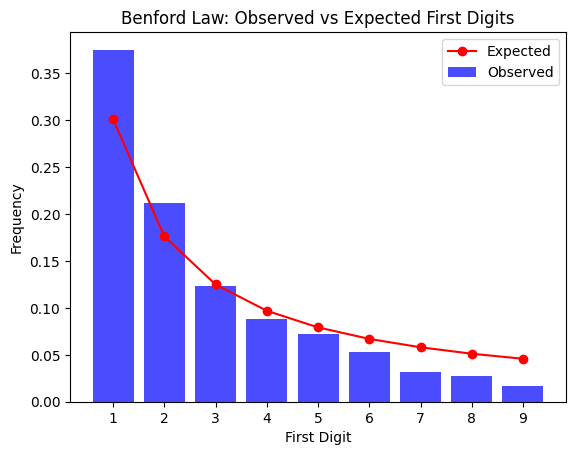

In [186]:
# Identificar créditos irregulares: aquellos cuya frecuencia observada difiere más de un 5% de la esperada
threshold = 0.05
colocacion_creditos['irregular_benford'] = colocacion_creditos['first_digit'].apply(
    lambda x: 1 if abs(benford_df.loc[x, 'observed'] - benford_df.loc[x, 'expected']) > threshold else 0
)

# Graficar las observadas vs. esperadas de la Ley de Benford
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Graficar observadas
ax.bar(benford_df.index, benford_df['observed'], label='Observed', alpha=0.7, color='blue')
# Graficar esperadas
ax.plot(benford_df.index, benford_df['expected'], label='Expected', color='red', marker='o')

ax.set_title('Benford Law: Observed vs Expected First Digits')
ax.set_xlabel('First Digit')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

In [187]:
# Revisar las columnas exactas en el dataframe 'historico_hallazgos' para evitar errores
historico_hallazgos.columns

Index(['Num', 'ID_modif', 'Cliente', 'Analista', 'Nombre analista',
       'Tipo crédito', 'Fecha desem', 'Visita_analista_crédito',
       'Visita_auditor', 'Actividad', 'Monto', 'Cuota', 'Plazo', 'Categoria',
       'Hallazgo', 'Tipo hallazgo', 'Riesgo', 'Calificación cartera',
       'Relaciones Laborales', 'Oficina ', 'zona ', 'Regional',
       'Validación unico', 'Tipo analisis ', 'Clasificac analisis', 'Estado',
       'Año', 'Tipo'],
      dtype='object')

In [188]:
# Vamos a inspeccionar las categorías de las variables con alta cardinalidad para proponer posibles agrupaciones
# Revisaremos las variables categoricas más relevantes
# Eliminar los espacios innecesarios en los nombres de columnas del dataframe 'historico_hallazgos'
historico_hallazgos.columns = historico_hallazgos.columns.str.strip()
# Variables categóricas en 'colocacion_creditos'
categorical_cols_colocacion = ['zona', 'coficina', 'noficina', 'analista', 'producto', 'tipo']

# Contar las categorías únicas de cada variable categórica
categorical_summary_colocacion = colocacion_creditos[categorical_cols_colocacion].nunique()

# Variables categóricas en 'historico_hallazgos'
categorical_cols_historico = ['Analista', 'Oficina', 'zona', 'Tipo crédito']

# Contar las categorías únicas de cada variable categórica
categorical_summary_historico = historico_hallazgos[categorical_cols_historico].nunique()

categorical_summary_colocacion, categorical_summary_historico

(zona         19
 coficina    145
 noficina    145
 analista    973
 producto     11
 tipo          3
 dtype: int64,
 Analista        406
 Oficina          63
 zona             17
 Tipo crédito      5
 dtype: int64)

In [189]:


# Volver a contar las categorías únicas en las columnas categóricas
categorical_cols_historico = ['Analista', 'Oficina', 'zona', 'Tipo crédito']
categorical_summary_historico = historico_hallazgos[categorical_cols_historico].nunique()

# Mostrar los resúmenes de ambas tablas
categorical_summary_colocacion, categorical_summary_historico

(zona         19
 coficina    145
 noficina    145
 analista    973
 producto     11
 tipo          3
 dtype: int64,
 Analista        406
 Oficina          63
 zona             17
 Tipo crédito      5
 dtype: int64)

Colocacion_creditos:

    zona: 19 categorías.
    coficina: 145 categorías.
    noficina: 145 categorías.
    analista: 973 categorías.
    producto: 11 categorías.
    tipo: 3 categorías.

Historico_hallazgos:

    Analista: 406 categorías.
    Oficina: 63 categorías.
    zona: 17 categorías.
    Tipo crédito: 5 categorías.

In [190]:
# Listar las columnas de ambos datasets para inspeccionarlas manualmente y ver posibles coincidencias
colocacion_creditos.columns, historico_hallazgos.columns

(Index(['zona', 'coficina', 'noficina', 'credito', 'id', 'nombre', 'finicio',
        'analista', 'saldo', 'monto', 'plazo', 'vcuota', 'tasa', 'producto',
        'tipo', 'fproxpago', 'first_digit', 'irregular_benford'],
       dtype='object'),
 Index(['Num', 'ID_modif', 'Cliente', 'Analista', 'Nombre analista',
        'Tipo crédito', 'Fecha desem', 'Visita_analista_crédito',
        'Visita_auditor', 'Actividad', 'Monto', 'Cuota', 'Plazo', 'Categoria',
        'Hallazgo', 'Tipo hallazgo', 'Riesgo', 'Calificación cartera',
        'Relaciones Laborales', 'Oficina', 'zona', 'Regional',
        'Validación unico', 'Tipo analisis', 'Clasificac analisis', 'Estado',
        'Año', 'Tipo'],
       dtype='object'))

In [191]:
# Comparar valores en las posibles columnas comunes

# Revisar algunas filas en común para 'zona', 'analista', 'monto' y 'plazo'
comparison_columns = ['zona', 'analista', 'monto', 'plazo']

# Mostrar algunas filas de colocacion_creditos y historico_hallazgos
colocacion_sample = colocacion_creditos[comparison_columns].head()
historico_sample = historico_hallazgos[['zona', 'Analista', 'Monto', 'Plazo']].head()

colocacion_sample, historico_sample

(   zona analista    monto  plazo
 0     1      DPC  1181630     10
 1     1      JHJ  1166688     12
 2     1      FUX  1537195     15
 3     1      GFD  1877610     15
 4     1      JHJ  1266688     12,
    zona Analista      Monto  Plazo
 0    12      AIZ  15069.268     36
 1     1      JQQ    402.000    626
 2    11      HZT   1433.360     15
 3    12      IOC  19213.296     42
 4     3      CZL   1055.378      6)

Al comparar los valores de las columnas clave en ambos datasets, noto lo siguiente:

    Zona: Aunque las zonas parecen coincidir (por ejemplo, zona 1 y zona 12), las demás columnas como analista no coinciden completamente en ambos datasets.
    Monto y Plazo: Los valores de Monto y Plazo difieren significativamente entre ambos datasets, lo que indica que no se refieren a los mismos créditos.

Conclusión:

Los dos datasets no parecen compartir los mismos créditos o clientes directamente. Sin embargo, aún podemos intentar unirlos a través de zona o analista para obtener una relación geográfica o de desempeño de los analistas. Esta unión no será directa por crédito, pero puede proporcionar información adicional para analizar el riesgo.



​


In [192]:
merged_data = pd.merge(colocacion_creditos, historico_hallazgos, how='left', on='zona')

In [193]:
merged_data.head()

,zona,coficina,noficina,credito,id,nombre,finicio,analista,saldo,monto,...,Calificación cartera,Relaciones Laborales,Oficina,Regional,Validación unico,Tipo analisis,Clasificac analisis,Estado,Año,Tipo
0,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,No,Si,Poblado,1.0,NaN,NaN,NaN,Castigo,2022.0,Afecta Estabilidad
1,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Normal,2022.0,Afecta Estabilidad
2,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Cancelada,2022.0,Afecta Estabilidad
3,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Normal,2022.0,Afecta Estabilidad
4,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Cancelada,2022.0,Afecta Estabilidad


In [194]:
'irregular_benford' in merged_data.columns

True

In [195]:
# Verificar los valores faltantes (NaN) en el dataset combinado
missing_values = merged_data.isnull().sum()

# Mostrar solo las columnas que tienen valores faltantes
missing_values[missing_values > 0]

Num                           2456
ID_modif                      2456
Cliente                       3524
Analista                      2456
Nombre analista               2456
Tipo crédito                  2456
Fecha desem                   2456
Visita_analista_crédito       2456
Visita_auditor                2456
Actividad                     2456
Monto                         2456
Cuota                         2456
Plazo                         2456
Categoria                     2456
Hallazgo                      2456
Tipo hallazgo                 3456
Riesgo                        2456
Calificación cartera          2456
Relaciones Laborales          2456
Oficina                       2456
Regional                      2456
Validación unico           3824914
Tipo analisis              1552763
Clasificac analisis        1552763
Estado                        2456
Año                           2456
Tipo                       1130244
dtype: int64

In [196]:
# Número total de filas en el dataset combinado
total_rows = len(merged_data)

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / total_rows) * 100

# Mostrar las columnas con su porcentaje de valores faltantes
missing_percentage[missing_percentage > 0]

Num                         0.059990
ID_modif                    0.059990
Cliente                     0.086077
Analista                    0.059990
Nombre analista             0.059990
Tipo crédito                0.059990
Fecha desem                 0.059990
Visita_analista_crédito     0.059990
Visita_auditor              0.059990
Actividad                   0.059990
Monto                       0.059990
Cuota                       0.059990
Plazo                       0.059990
Categoria                   0.059990
Hallazgo                    0.059990
Tipo hallazgo               0.084416
Riesgo                      0.059990
Calificación cartera        0.059990
Relaciones Laborales        0.059990
Oficina                     0.059990
Regional                    0.059990
Validación unico           93.426578
Tipo analisis              37.927476
Clasificac analisis        37.927476
Estado                      0.059990
Año                         0.059990
Tipo                       27.607112
d

In [197]:
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

<Figure size 1500x1000 with 0 Axes>

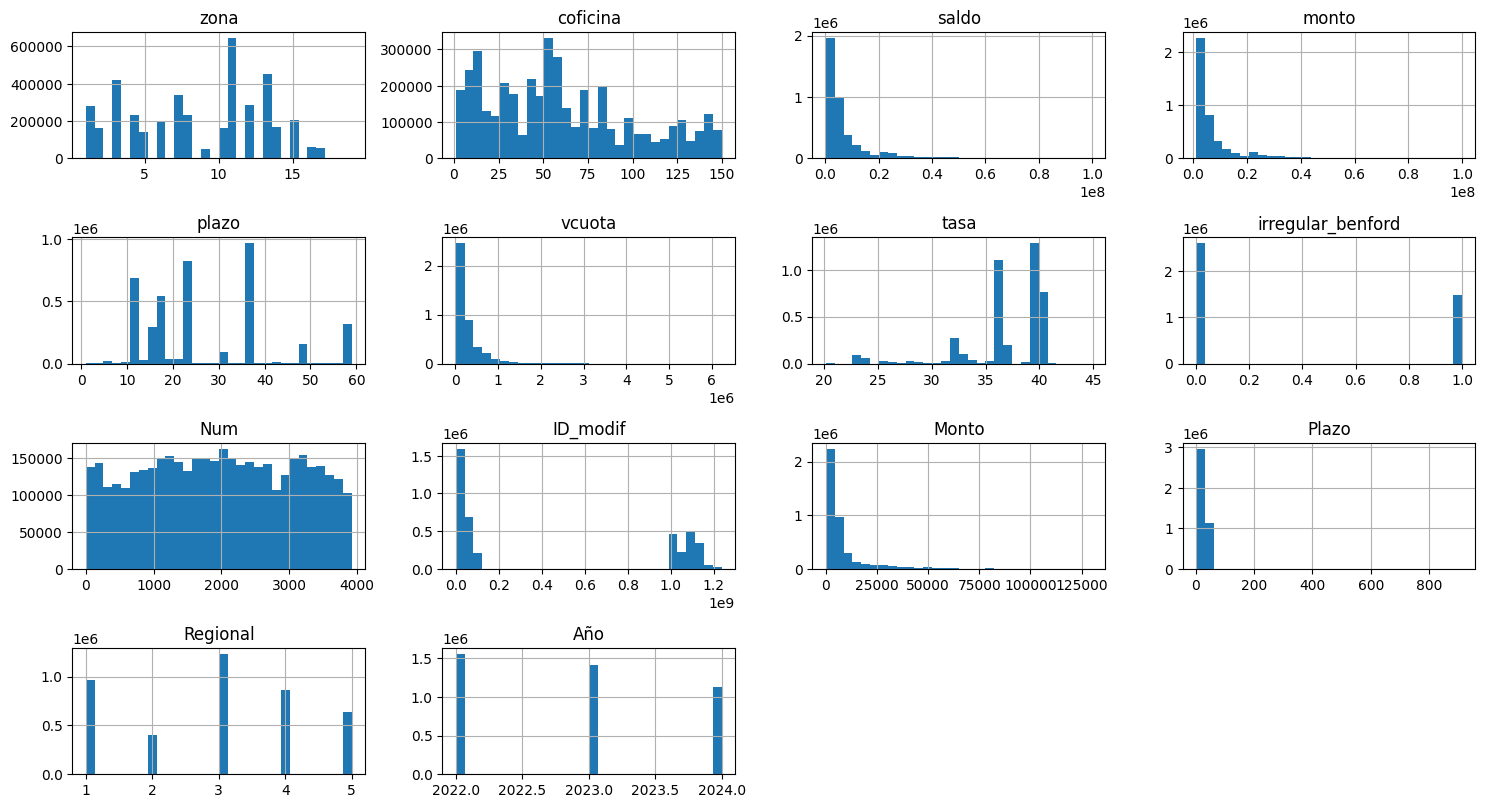

In [198]:
plt.figure(figsize=(15, 10))
merged_data[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

    Monto y Saldo:
        Ambas variables presentan una distribución sesgada hacia la izquierda, lo que indica que la mayoría de los créditos tienen montos y saldos pequeños, mientras que unos pocos tienen montos y saldos mucho mayores. Esto sugiere una concentración de pequeños créditos, lo cual es común en microcréditos.

    Plazo:
        Se observa que los plazos están distribuidos en algunos valores específicos. Hay ciertas duraciones que son mucho más comunes, como entre 10 y 30 meses, lo que podría reflejar las políticas internas de la institución en términos de períodos de crédito estándar.

    Tasa:
        La tasa de interés parece estar agrupada principalmente alrededor de dos valores (35% y 40%), lo que sugiere que la mayoría de los créditos se otorgan en estos rangos. Esto podría indicar una política uniforme en la asignación de tasas, posiblemente ligada a la evaluación de riesgo.

    Irregularidades de Benford (irregular_benford):
        La mayoría de los casos presentan un valor de 0, indicando que no hay irregularidades según la Ley de Benford, mientras que solo una minoría de los casos muestra irregularidades (valor 1). Esto será clave en el análisis de riesgo y auditoría, ya que las irregularidades de Benford pueden ser una señal de posible fraude o anomalías en los datos.

    Distribución geográfica (zona y oficina):
        Las variables relacionadas con la ubicación, como zona y oficina, muestran distribuciones variadas, con algunas áreas mucho más representadas que otras. Esto podría reflejar las zonas más activas en la concesión de microcréditos o en donde hay más clientes riesgosos, lo cual es útil para estrategias de intervención localizadas.

    Año:
        Las transacciones y registros parecen estar distribuidos en los años recientes (2022-2024), lo cual es relevante para evaluar el comportamiento actual de los créditos y cómo las condiciones han cambiado en los últimos años.

Puntos clave a destacar:

    Concentración de pequeños créditos: La mayoría de los créditos son de montos pequeños, pero algunos montos grandes requieren especial atención.
    Distribución uniforme de tasas: Esto indica que la organización sigue políticas consistentes para la asignación de tasas de interés, pero también sugiere que podría haber oportunidades para mejorar la personalización según el perfil de riesgo.
    Posibles anomalías detectadas: Las irregularidades basadas en la Ley de Benford sugieren posibles áreas de riesgo, que deben ser monitoreadas más de cerca.
    Plazos y oficinas: Ciertas oficinas y plazos están más representados, lo que puede indicar áreas de mayor riesgo o necesidad de intervención.

<Figure size 1500x1000 with 0 Axes>

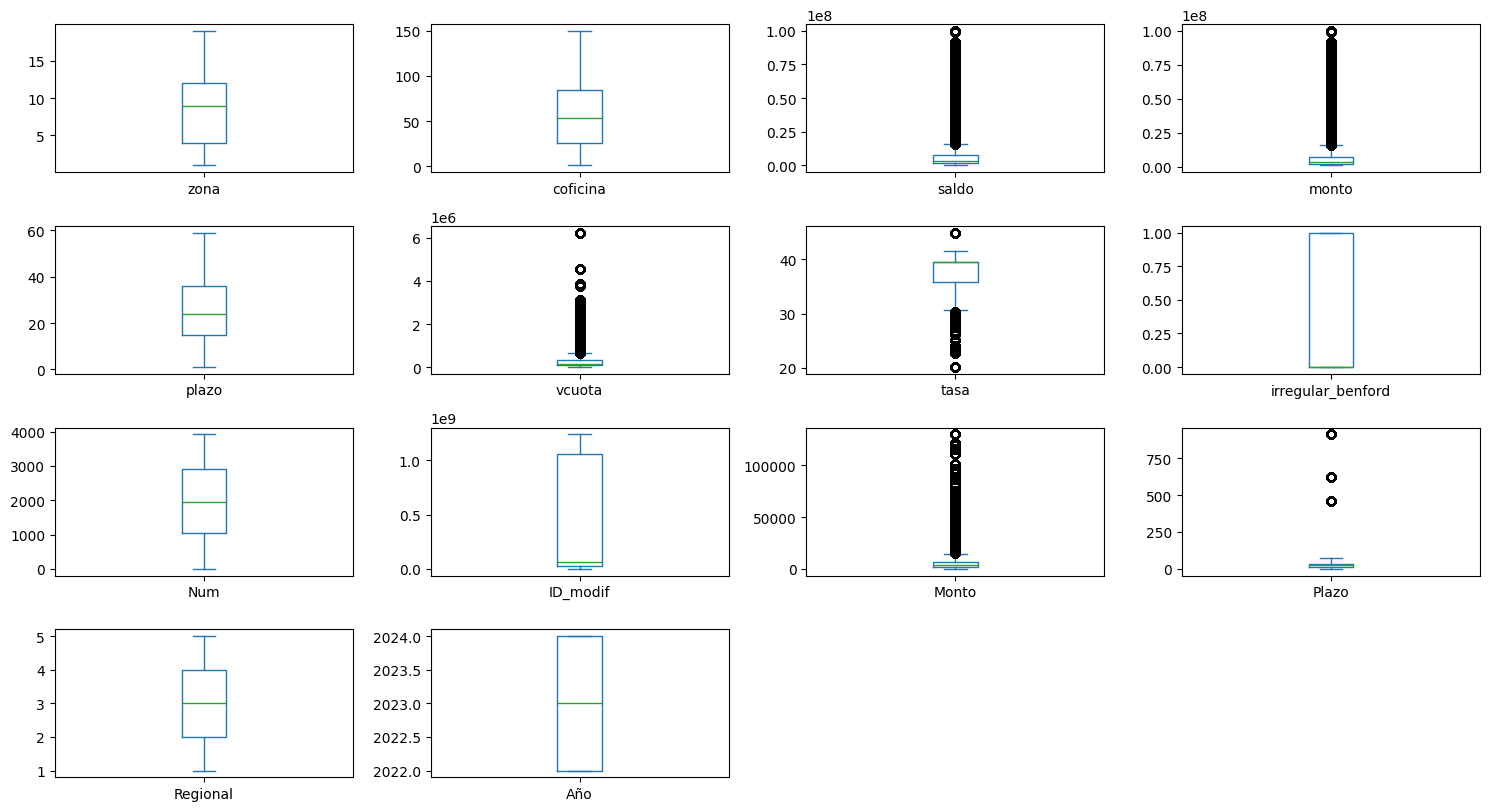

In [199]:

# Crear boxplots para las variables numéricas y visualizar posibles outliers
plt.figure(figsize=(15, 10))

# Crear boxplots para cada variable numérica
merged_data[numeric_columns].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 10), sharex=False, sharey=False)

plt.tight_layout()
plt.show()

Outliers significativos en saldo, monto, vcuota, y tasa:

    Estas variables presentan muchos outliers. En particular, las distribuciones de saldo y monto están muy sesgadas, con valores extremos mucho mayores que el rango intercuartil (IQR), lo que sugiere que existen varios créditos con montos y saldos muy altos.
    Tasa también muestra algunos valores atípicos hacia la parte inferior de la distribución, lo que podría indicar tasas de interés inusuales.

Distribución de irregular_benford:

    Como se esperaba, esta variable tiene solo dos valores (0 y 1), donde un número significativo de casos fueron marcados como irregulares. Esto puede ser útil para analizar la relación entre las irregularidades detectadas y otras variables.

plazo y Num:

    Estas variables no muestran tantos outliers. La mayoría de los valores parecen estar dentro de un rango más moderado y tienen distribuciones más uniformes.

ID_modif:

    Esta variable también presenta muchos valores extremos, lo que sugiere que ciertos identificadores pueden ser significativamente mayores que otros, aunque el significado de esta variable no está claro todavía.

Distribuciones relativamente normales:

    Algunas variables como plazo, zona, y Regional no muestran valores atípicos importantes y tienen distribuciones más controladas, lo que sugiere que podrían ser más estables para el análisis.

In [200]:
# Crear un mapeo para transformar la variable 'Riesgo'
riesgo_mapping = {
    '1 - Alto': 1,
    '2 - Medio': 2,
    '3 - Bajo': 3,
    '4 - Otro': 4
}

# Aplicar el mapeo a la columna 'Riesgo'
merged_data['Riesgo'] = merged_data['Riesgo'].map(riesgo_mapping)

# Verificar las primeras filas para confirmar la transformación
print(merged_data[['Riesgo']].head())

   Riesgo
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


In [201]:
merged_data

,zona,coficina,noficina,credito,id,nombre,finicio,analista,saldo,monto,...,Calificación cartera,Relaciones Laborales,Oficina,Regional,Validación unico,Tipo analisis,Clasificac analisis,Estado,Año,Tipo
0,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,No,Si,Poblado,1.0,NaN,NaN,NaN,Castigo,2022.0,Afecta Estabilidad
1,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Normal,2022.0,Afecta Estabilidad
2,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Cancelada,2022.0,Afecta Estabilidad
3,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Normal,2022.0,Afecta Estabilidad
4,1,1,PRINCIPAL,001MH0109358,13435949.0,ALDEMAR MENDEZ RIV,2020-10-31,DPC,1181630,1181630,...,Si,Si,Independencia,1.0,NaN,NaN,NaN,Cancelada,2022.0,Afecta Estabilidad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094027,13,123,LA PLATA,123PG0200482,4730117.0,JOSE LEONIDAS YOTE,2024-10-01,EWE,3969776,3969776,...,No,No,Jamundí,3.0,NaN,Sin hallazgo,Sin hallazgo,DESCONOCIDO,2024.0,NaN
4094028,13,123,LA PLATA,123PG0200482,4730117.0,JOSE LEONIDAS YOTE,2024-10-01,EWE,3969776,3969776,...,No,No,Jamundí,3.0,NaN,Sin hallazgo,Sin hallazgo,DESCONOCIDO,2024.0,NaN
4094029,13,123,LA PLATA,123PG0200482,4730117.0,JOSE LEONIDAS YOTE,2024-10-01,EWE,3969776,3969776,...,Si,Si,Jamundí,3.0,NaN,Análisis de carácter,Alerta de fraude,DESCONOCIDO,2024.0,NaN
4094030,13,123,LA PLATA,123PG0200482,4730117.0,JOSE LEONIDAS YOTE,2024-10-01,EWE,3969776,3969776,...,No,No,Jamundí,3.0,NaN,Sin hallazgo,Sin hallazgo,DESCONOCIDO,2024.0,NaN


In [202]:
import numpy as np

# Definir un umbral para identificar outliers (por ejemplo, fuera del rango intercuartil)
def identificar_outliers(col):
    Q1 = merged_data[col].quantile(0.25)
    Q3 = merged_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = merged_data[(merged_data[col] < (Q1 - 1.5 * IQR)) | (merged_data[col] > (Q3 + 1.5 * IQR))]
    return outliers

# Identificar outliers en las columnas clave
outliers_monto = identificar_outliers('monto')
outliers_saldo = identificar_outliers('saldo')
outliers_tasa = identificar_outliers('tasa')

# Relacionar outliers con irregular_benford
print("Outliers en 'monto' marcados como irregulares por Benford:")
print(outliers_monto[outliers_monto['irregular_benford'] == 1])

print("Outliers en 'saldo' marcados como irregulares por Benford:")
print(outliers_saldo[outliers_saldo['irregular_benford'] == 1])

print("Outliers en 'tasa' marcados como irregulares por Benford:")
print(outliers_tasa[outliers_tasa['irregular_benford'] == 1])

# Relacionar outliers con la variable 'Riesgo'
print("Outliers en 'monto' con Riesgo Alto (1):")
print(outliers_monto[outliers_monto['Riesgo'] == 1])

print("Outliers en 'saldo' con Riesgo Alto (1):")
print(outliers_saldo[outliers_saldo['Riesgo'] == 1])

print("Outliers en 'tasa' con Riesgo Alto (1):")
print(outliers_tasa[outliers_tasa['Riesgo'] == 1])


Outliers en 'monto' marcados como irregulares por Benford:
         zona  coficina            noficina       credito            id  \
6942        1         3       INDEPENDENCIA  003PG1600109    38464466.0   
6943        1         3       INDEPENDENCIA  003PG1600109    38464466.0   
6944        1         3       INDEPENDENCIA  003PG1600109    38464466.0   
6945        1         3       INDEPENDENCIA  003PG1600109    38464466.0   
6946        1         3       INDEPENDENCIA  003PG1600109    38464466.0   
...       ...       ...                 ...           ...           ...   
4061947    10        98  BUCARAMANGA CENTRO  098PG0400179  1098649015.0   
4061948    10        98  BUCARAMANGA CENTRO  098PG0400179  1098649015.0   
4061949    10        98  BUCARAMANGA CENTRO  098PG0400179  1098649015.0   
4061950    10        98  BUCARAMANGA CENTRO  098PG0400179  1098649015.0   
4061951    10        98  BUCARAMANGA CENTRO  098PG0400179  1098649015.0   

                     nombre    finicio a

Análisis de los resultados:

    Outliers en 'monto', 'saldo', y 'tasa' marcados como irregulares por Benford:
        Se identificaron varios créditos que son outliers en estas variables y, al mismo tiempo, están marcados como irregulares según la Ley de Benford. Esto sugiere que estos créditos pueden tener características inusuales tanto en su valor monetario como en sus patrones numéricos.
        Los valores irregulares de monto, saldo, y tasa junto con el indicador de irregularidad de Benford podrían ser importantes para nuestro modelo de riesgo.

    Outliers en 'monto', 'saldo', y 'tasa' con Riesgo Alto:
        Existen créditos que son outliers en estas variables y, además, están clasificados con un riesgo alto (Riesgo = 1). Estos créditos representan una combinación de riesgo inherente (alto riesgo crediticio) con montos, saldos o tasas extremas, lo que refuerza su potencial de riesgo.
        En particular, los casos en las localidades de Independencia, Poblado, y Puerto Gaitán aparecen varias veces en los outliers con riesgo alto, lo que puede indicar patrones específicos por región.

Conclusión:

    Relación con el riesgo: Los créditos que son outliers en montos, saldos y tasas y están marcados como irregulares o de alto riesgo son claros candidatos para una auditoría más profunda. Estas observaciones apoyan la idea de que los outliers deben considerarse en nuestro análisis de riesgo.
    Patrones geográficos: Algunos outliers se concentran en ciertas localidades, lo que puede sugerir patrones de riesgo regional que podrían investigarse más a fondo.

Próximos pasos:

    Incluir estas características en el modelo de riesgo: Dado que hemos identificado créditos con montos y saldos extremos que también son irregulares o de alto riesgo, podríamos incluir estas observaciones como características adicionales en el modelo predictivo de riesgo.
    Análisis de clusters geográficos: Podríamos explorar si ciertas regiones tienen más créditos de alto riesgo y si estos riesgos están correlacionados con características específicas de los clientes o de los créditos.
    Evaluación de las agencias: Podríamos proponer las agencias con más outliers y mayor riesgo como prioritarias para auditorías.

In [203]:
numeric_columns

Index(['zona', 'coficina', 'saldo', 'monto', 'plazo', 'vcuota', 'tasa',
       'irregular_benford', 'Num', 'ID_modif', 'Monto', 'Plazo', 'Regional',
       'Año'],
      dtype='object')

In [204]:
# Función para limpiar columnas numéricas, eliminando caracteres no numéricos
def clean_numeric_column(column):
    # Reemplazar caracteres no numéricos y convertir a float
    merged_data[column] = pd.to_numeric(merged_data[column].replace('[^0-9.-]', '', regex=True), errors='coerce')

# Limpiar las columnas numéricas
numeric_columns_to_impute = ['Num', 'ID_modif', 'Monto', 'Cuota', 'Plazo', 'Año']
for column in numeric_columns_to_impute:
    clean_numeric_column(column)

# Ahora aplicar la imputación de la mediana
for column in numeric_columns_to_impute:
    merged_data[column].fillna(merged_data[column].median(), inplace=True)

# Verificar si quedan valores faltantes
missing_values_after_imputation = merged_data.isnull().sum()

# Mostrar si quedan NaN
print(missing_values_after_imputation[missing_values_after_imputation > 0])


C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2215543239.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[column].fillna(merged_data[column].median(), inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2215543239.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

Cliente                       3524
Analista                      2456
Nombre analista               2456
Tipo crédito                  2456
Fecha desem                   2456
Visita_analista_crédito       2456
Visita_auditor                2456
Actividad                     2456
Categoria                     2456
Hallazgo                      2456
Tipo hallazgo                 3456
Riesgo                      197716
Calificación cartera          2456
Relaciones Laborales          2456
Oficina                       2456
Regional                      2456
Validación unico           3824914
Tipo analisis              1552763
Clasificac analisis        1552763
Estado                        2456
Tipo                       1130244
dtype: int64


In [205]:
# Eliminar la columna 'Actividad' del dataset
merged_data = merged_data.drop(columns=['Actividad'])

# Verificar si la columna fue eliminada correctamente
print(merged_data.columns)

Index(['zona', 'coficina', 'noficina', 'credito', 'id', 'nombre', 'finicio',
       'analista', 'saldo', 'monto', 'plazo', 'vcuota', 'tasa', 'producto',
       'tipo', 'fproxpago', 'first_digit', 'irregular_benford', 'Num',
       'ID_modif', 'Cliente', 'Analista', 'Nombre analista', 'Tipo crédito',
       'Fecha desem', 'Visita_analista_crédito', 'Visita_auditor', 'Monto',
       'Cuota', 'Plazo', 'Categoria', 'Hallazgo', 'Tipo hallazgo', 'Riesgo',
       'Calificación cartera', 'Relaciones Laborales', 'Oficina', 'Regional',
       'Validación unico', 'Tipo analisis', 'Clasificac analisis', 'Estado',
       'Año', 'Tipo'],
      dtype='object')


Con 2365 valores distintos y ejemplos de textos variados, parece que la mejor opción para simplificar el análisis sería eliminar la columna. Esto te permitirá centrarte en las variables que son más estructuradas y relevantes para el análisis de riesgo.

In [206]:
# Imputación para variables categóricas utilizando la moda
categorical_columns_to_impute = [
    'Cliente', 'Analista', 'Nombre analista', 'Tipo crédito', 'Fecha desem', 
    'Visita_analista_crédito', 'Visita_auditor', 'Categoria', 
    'Hallazgo', 'Tipo hallazgo', 'Riesgo', 'Calificación cartera', 
    'Relaciones Laborales', 'Oficina', 'Regional', 'Estado', 'Tipo'
]

# Imputar usando la moda
for column in categorical_columns_to_impute:
    merged_data[column] = merged_data[column].fillna(merged_data[column].mode()[0])

# Verificar si quedan valores faltantes
missing_values_after_imputation = merged_data.isnull().sum()

# Mostrar columnas con valores faltantes
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Validación unico       3824914
Tipo analisis          1552763
Clasificac analisis    1552763
dtype: int64


In [207]:
# Eliminar las columnas con muchos valores faltantes
columns_to_drop = ['Validación unico', 'Tipo analisis', 'Clasificac analisis']

# Eliminar las columnas del dataset
merged_data = merged_data.drop(columns=columns_to_drop)

# Verificar si las columnas fueron eliminadas correctamente
print(merged_data.columns)

Index(['zona', 'coficina', 'noficina', 'credito', 'id', 'nombre', 'finicio',
       'analista', 'saldo', 'monto', 'plazo', 'vcuota', 'tasa', 'producto',
       'tipo', 'fproxpago', 'first_digit', 'irregular_benford', 'Num',
       'ID_modif', 'Cliente', 'Analista', 'Nombre analista', 'Tipo crédito',
       'Fecha desem', 'Visita_analista_crédito', 'Visita_auditor', 'Monto',
       'Cuota', 'Plazo', 'Categoria', 'Hallazgo', 'Tipo hallazgo', 'Riesgo',
       'Calificación cartera', 'Relaciones Laborales', 'Oficina', 'Regional',
       'Estado', 'Año', 'Tipo'],
      dtype='object')


In [208]:
# Verificar las variables categóricas restantes y contar cuántas categorías únicas tienen
categorical_columns = merged_data.select_dtypes(include=['object']).columns

# Contar las categorías únicas en cada columna categórica
unique_categories = {col: merged_data[col].nunique() for col in categorical_columns}

# Mostrar las columnas categóricas y cuántas categorías únicas tienen
for col, unique in unique_categories.items():
    print(f"{col}: {unique} categorías únicas")

noficina: 145 categorías únicas
credito: 20188 categorías únicas
id: 20176 categorías únicas
nombre: 19892 categorías únicas
analista: 973 categorías únicas
producto: 11 categorías únicas
tipo: 3 categorías únicas
first_digit: 9 categorías únicas
Cliente: 3459 categorías únicas
Analista: 406 categorías únicas
Nombre analista: 403 categorías únicas
Tipo crédito: 5 categorías únicas
Fecha desem: 804 categorías únicas
Visita_analista_crédito: 691 categorías únicas
Visita_auditor: 882 categorías únicas
Categoria: 30 categorías únicas
Hallazgo: 91 categorías únicas
Tipo hallazgo: 10 categorías únicas
Calificación cartera: 3 categorías únicas
Relaciones Laborales: 3 categorías únicas
Oficina: 63 categorías únicas
Estado: 7 categorías únicas
Tipo: 4 categorías únicas


In [209]:
# Comparar cuántos valores de 'Cliente' y 'nombre' son iguales
matching = (merged_data['Cliente'] == merged_data['nombre']).sum()

# Calcular el porcentaje de coincidencias
total_rows = len(merged_data)
percentage_matching = (matching / total_rows) * 100

# Mostrar porcentaje de coincidencias
print(f"Porcentaje de coincidencias entre 'Cliente' y 'nombre': {percentage_matching:.2f}%")

# Mostrar ejemplos donde 'Cliente' y 'nombre' no coinciden
differences = merged_data[merged_data['Cliente'] != merged_data['nombre']]
print("Ejemplos donde 'Cliente' y 'nombre' no coinciden:")
print(differences[['Cliente', 'nombre']].head())

Porcentaje de coincidencias entre 'Cliente' y 'nombre': 0.00%
Ejemplos donde 'Cliente' y 'nombre' no coinciden:
                                             Cliente              nombre
0  Casas Marisol                                 ...  ALDEMAR MENDEZ RIV
1                               Martha Cecilia Veru   ALDEMAR MENDEZ RIV
2                              Flor Alba Nunez Tagua  ALDEMAR MENDEZ RIV
3                     Sandra Milena Benitez Mosquera  ALDEMAR MENDEZ RIV
4                      Carlos Andres Corrales Ocampo  ALDEMAR MENDEZ RIV


In [210]:
# Comparar cuántos valores de 'id' y 'ID_modif' son iguales
matching_ids = (merged_data['id'] == merged_data['ID_modif']).sum()

# Calcular el porcentaje de coincidencias
total_rows = len(merged_data)
percentage_matching_ids = (matching_ids / total_rows) * 100

# Mostrar porcentaje de coincidencias entre 'id' y 'ID_modif'
print(f"Porcentaje de coincidencias entre 'id' y 'ID_modif': {percentage_matching_ids:.2f}%")

# Mostrar ejemplos donde 'id' y 'ID_modif' no coinciden
differences_ids = merged_data[merged_data['id'] != merged_data['ID_modif']]
print("Ejemplos donde 'id' y 'ID_modif' no coinciden:")
print(differences_ids[['id', 'ID_modif']].head())

Porcentaje de coincidencias entre 'id' y 'ID_modif': 0.00%
Ejemplos donde 'id' y 'ID_modif' no coinciden:
           id      ID_modif
0  13435949.0  1.143937e+09
1  13435949.0  3.194041e+07
2  13435949.0  1.006005e+09
3  13435949.0  6.697209e+07
4  13435949.0  6.526771e+06


In [211]:
# Convertir las columnas a string para compararlas correctamente
merged_data['id_str'] = merged_data['id'].astype(str).str.strip()
merged_data['ID_modif_str'] = merged_data['ID_modif'].astype(str).str.strip()

# Comparar nuevamente después de la limpieza
matching_ids_cleaned = (merged_data['id_str'] == merged_data['ID_modif_str']).sum()

# Calcular el porcentaje de coincidencias después de la limpieza
percentage_matching_ids_cleaned = (matching_ids_cleaned / total_rows) * 100

# Mostrar porcentaje de coincidencias después de la limpieza
print(f"Porcentaje de coincidencias entre 'id' y 'ID_modif' (después de la limpieza): {percentage_matching_ids_cleaned:.2f}%")

# Mostrar ejemplos donde 'id' y 'ID_modif' no coinciden
differences_ids_cleaned = merged_data[merged_data['id_str'] != merged_data['ID_modif_str']]
print("Ejemplos donde 'id' y 'ID_modif' no coinciden (después de la limpieza):")
print(differences_ids_cleaned[['id_str', 'ID_modif_str']].head())

Porcentaje de coincidencias entre 'id' y 'ID_modif' (después de la limpieza): 0.00%
Ejemplos donde 'id' y 'ID_modif' no coinciden (después de la limpieza):
       id_str  ID_modif_str
0  13435949.0  1143936676.0
1  13435949.0    31940414.0
2  13435949.0  1006004562.0
3  13435949.0    66972091.0
4  13435949.0     6526771.0


El volver anonimos los IDs afecta el desempeño del modelo. No podemos verificar cuales clientes se encuentran en ambos datasets, de hecho podriamos decir que ninguno está en ambos. De igual manera contamos con nombre y Cliente, en donde nombre suele repetirse varias veces 1 mismo valor, mientras que Cliente parece ser más unico. dicho esto, nos quedaremos con la columna de Cliente

In [212]:
# Identificar todas las columnas categóricas restantes
categorical_columns = merged_data.select_dtypes(include=['object']).columns

# Mostrar las columnas categóricas y cuántas categorías únicas tienen
for col in categorical_columns:
    print(f"Columna: {col}, Categorías únicas: {merged_data[col].nunique()}")


Columna: noficina, Categorías únicas: 145
Columna: credito, Categorías únicas: 20188
Columna: id, Categorías únicas: 20176
Columna: nombre, Categorías únicas: 19892
Columna: analista, Categorías únicas: 973
Columna: producto, Categorías únicas: 11
Columna: tipo, Categorías únicas: 3
Columna: first_digit, Categorías únicas: 9
Columna: Cliente, Categorías únicas: 3459
Columna: Analista, Categorías únicas: 406
Columna: Nombre analista, Categorías únicas: 403
Columna: Tipo crédito, Categorías únicas: 5
Columna: Fecha desem, Categorías únicas: 804
Columna: Visita_analista_crédito, Categorías únicas: 691
Columna: Visita_auditor, Categorías únicas: 882
Columna: Categoria, Categorías únicas: 30
Columna: Hallazgo, Categorías únicas: 91
Columna: Tipo hallazgo, Categorías únicas: 10
Columna: Calificación cartera, Categorías únicas: 3
Columna: Relaciones Laborales, Categorías únicas: 3
Columna: Oficina, Categorías únicas: 63
Columna: Estado, Categorías únicas: 7
Columna: Tipo, Categorías únicas: 4

In [213]:
# Intentar convertir las fechas sin especificar formato (pero marcando errores)
merged_data['Visita_auditor'] = pd.to_datetime(merged_data['Visita_auditor'], errors='coerce')

# Identificar las filas donde no se pudo convertir la fecha
invalid_dates = merged_data[merged_data['Visita_auditor'].isna()]
print("Ejemplos de fechas inválidas o problemáticas:")
print(invalid_dates[['Visita_auditor']].head())



C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2294319036.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Visita_auditor'] = pd.to_datetime(merged_data['Visita_auditor'], errors='coerce')


Ejemplos de fechas inválidas o problemáticas:
   Visita_auditor
0             NaT
15            NaT
26            NaT
27            NaT
29            NaT


In [214]:
# Reemplazar "NO_VISITA" por NaN
merged_data['Visita_auditor'] = merged_data['Visita_auditor'].replace('NO_VISITA', pd.NaT)

# Crear una nueva columna binaria para indicar si hubo visita
merged_data['Visita_realizada'] = merged_data['Visita_auditor'].notna().astype(int)

# Convertir de nuevo a formato datetime
merged_data['Visita_auditor'] = pd.to_datetime(merged_data['Visita_auditor'], errors='coerce')

# Verificar los primeros valores
print(merged_data[['Visita_auditor', 'Visita_realizada']].head())


  Visita_auditor  Visita_realizada
0            NaT                 0
1     2022-08-12                 1
2     2022-08-22                 1
3     2022-08-16                 1
4     2022-08-17                 1


In [215]:
# Aplicar el mismo proceso a 'Visita_analista_crédito' y 'Fecha desem'

# Reemplazar "NO_VISITA" por NaT en 'Visita_analista_crédito'
merged_data['Visita_analista_crédito'] = merged_data['Visita_analista_crédito'].replace('NO_VISITA', pd.NaT)

# Crear una nueva columna binaria para indicar si hubo visita por parte del analista de crédito
merged_data['Visita_analista_realizada'] = merged_data['Visita_analista_crédito'].notna().astype(int)

# Convertir la columna 'Visita_analista_crédito' a formato datetime
merged_data['Visita_analista_crédito'] = pd.to_datetime(merged_data['Visita_analista_crédito'], errors='coerce')

# Verificar los primeros valores de 'Visita_analista_crédito' y su columna binaria
print(merged_data[['Visita_analista_crédito', 'Visita_analista_realizada']].head())

# Revisar la columna 'Fecha desem' y tratar los valores
merged_data['Fecha desem'] = pd.to_datetime(merged_data['Fecha desem'], errors='coerce')

# Verificar los primeros valores de 'Fecha desem'
print(merged_data[['Fecha desem']].head())

  Visita_analista_crédito  Visita_analista_realizada
0              2021-06-08                          1
1              2022-07-18                          1
2              2022-05-10                          1
3              2022-06-28                          1
4              2022-07-09                          1
  Fecha desem
0  2021-06-15
1  2022-07-23
2  2022-05-18
3  2022-07-01
4  2022-07-12


In [216]:
# Extraer características temporales de 'Fecha desem'
merged_data['Año_desem'] = merged_data['Fecha desem'].dt.year
merged_data['Mes_desem'] = merged_data['Fecha desem'].dt.month
merged_data['Día_semana_desem'] = merged_data['Fecha desem'].dt.weekday

# Extraer características temporales de 'Visita_analista_crédito'
merged_data['Año_visita_analista'] = merged_data['Visita_analista_crédito'].dt.year
merged_data['Mes_visita_analista'] = merged_data['Visita_analista_crédito'].dt.month
merged_data['Día_semana_visita_analista'] = merged_data['Visita_analista_crédito'].dt.weekday

# Calcular la diferencia en días entre 'Fecha desem' y 'Visita_analista_crédito'
merged_data['Diferencia_días_visita_desem'] = (merged_data['Fecha desem'] - merged_data['Visita_analista_crédito']).dt.days

# Verificar los primeros valores de las nuevas columnas
print(merged_data[['Año_desem', 'Mes_desem', 'Día_semana_desem', 'Año_visita_analista', 'Mes_visita_analista', 'Día_semana_visita_analista', 'Diferencia_días_visita_desem']].head())


   Año_desem  Mes_desem  Día_semana_desem  Año_visita_analista  \
0     2021.0        6.0               1.0               2021.0   
1     2022.0        7.0               5.0               2022.0   
2     2022.0        5.0               2.0               2022.0   
3     2022.0        7.0               4.0               2022.0   
4     2022.0        7.0               1.0               2022.0   

   Mes_visita_analista  Día_semana_visita_analista  \
0                  6.0                         1.0   
1                  7.0                         0.0   
2                  5.0                         1.0   
3                  6.0                         1.0   
4                  7.0                         5.0   

   Diferencia_días_visita_desem  
0                           7.0  
1                           5.0  
2                           8.0  
3                           3.0  
4                           3.0  


In [217]:
# 1. Eliminar las columnas innecesarias con demasiadas categorías
columns_to_drop = ['credito', 'id', 'nombre', 'id_str', 'ID_modif_str']
merged_data = merged_data.drop(columns=columns_to_drop)

# 2. Asegurar que 'Cliente' y 'noficina' son categóricas
merged_data['Cliente'] = merged_data['Cliente'].astype('category')
merged_data['noficina'] = merged_data['noficina'].astype('category')

# 3. Aplicar OneHotEncoding a columnas con pocas categorías
categorical_columns_for_onehot = ['producto', 'tipo', 'first_digit', 'Tipo crédito', 
                                  'Calificación cartera', 'Relaciones Laborales', 'Estado', 'Tipo']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns_for_onehot, drop_first=True)

# 4. Agrupar categorías menos comunes en 'Categoria', 'Hallazgo', y 'Tipo hallazgo'
columns_to_group = ['Categoria', 'Hallazgo', 'Tipo hallazgo']

for col in columns_to_group:
    value_counts = merged_data[col].value_counts()
    threshold = value_counts.quantile(0.90)  # Mantener el 90% de las categorías más frecuentes
    merged_data[col] = merged_data[col].apply(lambda x: x if value_counts[x] >= threshold else 'Otros')

# Verificar los primeros valores después de las transformaciones
print(merged_data.head())

   zona  coficina   noficina    finicio analista    saldo    monto  plazo  \
0     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
1     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
2     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
3     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
4     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   

   vcuota   tasa  ... Relaciones Laborales_Si  \
0  147304  32.16  ...                    True   
1  147304  32.16  ...                    True   
2  147304  32.16  ...                    True   
3  147304  32.16  ...                    True   
4  147304  32.16  ...                    True   

   Estado_Castigo                         \
0                                   True   
1                                  False   
2                                  False   
3                                  False   
4                     

In [218]:
merged_data

,zona,coficina,noficina,finicio,analista,saldo,monto,plazo,vcuota,tasa,...,Relaciones Laborales_Si,Estado_Castigo,Estado_Cobro Judicial,Estado_DESCONOCIDO,Estado_Modificado,Estado_Normal,Estado_Reestructurado,Tipo_Limitaciones,Tipo_Otros Hallazgos,Tipo_Sin Hallazgo
0,1,1,PRINCIPAL,2020-10-31,DPC,1181630,1181630,10,147304,32.16,...,True,True,False,False,False,False,False,False,False,False
1,1,1,PRINCIPAL,2020-10-31,DPC,1181630,1181630,10,147304,32.16,...,True,False,False,False,False,True,False,False,False,False
2,1,1,PRINCIPAL,2020-10-31,DPC,1181630,1181630,10,147304,32.16,...,True,False,False,False,False,False,False,False,False,False
3,1,1,PRINCIPAL,2020-10-31,DPC,1181630,1181630,10,147304,32.16,...,True,False,False,False,False,True,False,False,False,False
4,1,1,PRINCIPAL,2020-10-31,DPC,1181630,1181630,10,147304,32.16,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094027,13,123,LA PLATA,2024-10-01,EWE,3969776,3969776,24,143842,35.88,...,False,False,False,True,False,False,False,False,True,False
4094028,13,123,LA PLATA,2024-10-01,EWE,3969776,3969776,24,143842,35.88,...,False,False,False,True,False,False,False,False,True,False
4094029,13,123,LA PLATA,2024-10-01,EWE,3969776,3969776,24,143842,35.88,...,True,False,False,True,False,False,False,False,True,False
4094030,13,123,LA PLATA,2024-10-01,EWE,3969776,3969776,24,143842,35.88,...,False,False,False,True,False,False,False,False,True,False


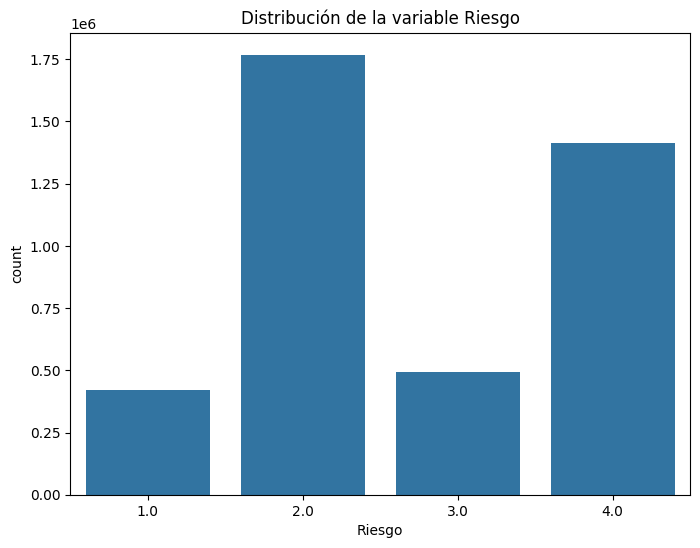

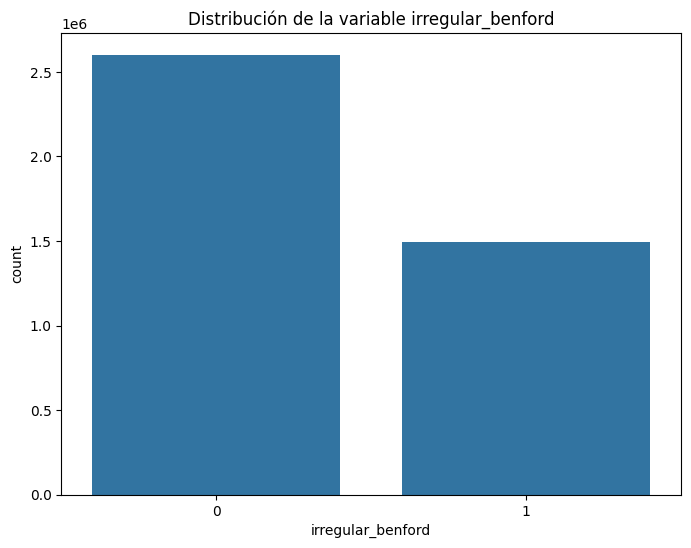

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable 'Riesgo'
plt.figure(figsize=(8, 6))
sns.countplot(x='Riesgo', data=merged_data)
plt.title('Distribución de la variable Riesgo')
plt.show()

# Distribución de la variable 'irregular_benford'
plt.figure(figsize=(8, 6))
sns.countplot(x='irregular_benford', data=merged_data)
plt.title('Distribución de la variable irregular_benford')
plt.show()


In [220]:
merged_data.columns

Index(['zona', 'coficina', 'noficina', 'finicio', 'analista', 'saldo', 'monto',
       'plazo', 'vcuota', 'tasa', 'fproxpago', 'irregular_benford', 'Num',
       'ID_modif', 'Cliente', 'Analista', 'Nombre analista', 'Fecha desem',
       'Visita_analista_crédito', 'Visita_auditor', 'Monto', 'Cuota', 'Plazo',
       'Categoria', 'Hallazgo', 'Tipo hallazgo', 'Riesgo', 'Oficina',
       'Regional', 'Año', 'Visita_realizada', 'Visita_analista_realizada',
       'Año_desem', 'Mes_desem', 'Día_semana_desem', 'Año_visita_analista',
       'Mes_visita_analista', 'Día_semana_visita_analista',
       'Diferencia_días_visita_desem', 'producto_MH04', 'producto_MH09',
       'producto_PG02', 'producto_PG04', 'producto_PG08', 'producto_PG10',
       'producto_PG12', 'producto_PG14', 'producto_PG16', 'producto_PG18',
       'tipo_PREFERENCI', 'tipo_RENOVACION', 'first_digit_2', 'first_digit_3',
       'first_digit_4', 'first_digit_5', 'first_digit_6', 'first_digit_7',
       'first_digit_8', 'first_d

In [221]:
# Mostrar las primeras filas de las columnas 'analista', 'Analista', y 'Nombre analista'
analista_columns_head = merged_data[['analista', 'Analista', 'Nombre analista']].head()
analista_columns_head


,analista,Analista,Nombre analista
0,DPC,JQQ,Alexander Joaqui Quintero
1,DPC,AQT,Quiroga Torres Alejandro
2,DPC,MAP,Monica Andrea Parra Murcia
3,DPC,BHK,Farid Perea Copete
4,DPC,AQT,Quiroga Torres Alejandro


In [222]:
# Crear un mapeo entre los analistas originales y sus valores de frecuencia
analista_mapping = merged_data[['Nombre analista', 'Analista']].drop_duplicates().sort_values(by='Analista', ascending=False)

# Mostrar el mapeo de los primeros analistas
print(analista_mapping.head(10))


                       Nombre analista Analista
89697       Luz Adriana Cubillos Hoyos      ZUL
195179    Yina Patricia Nieves Murillo      YPN
200824   Yeysireth Mariana Gamez Canga      YMG
142608            Efrain Pacheco Reyes      WBZ
47776               Sonia Cadena Lopez      SON
89875           Robinson Ocoro Centeno      ROO
7467         Luis Felipe Patino Osorio      OPF
32      Oscar Mauricio Velasquez Gomez      OMV
256654  Alvaro Jesus Dovales Hernandez      OFX
48766         Cynthia  Micolta Riascos      OFE


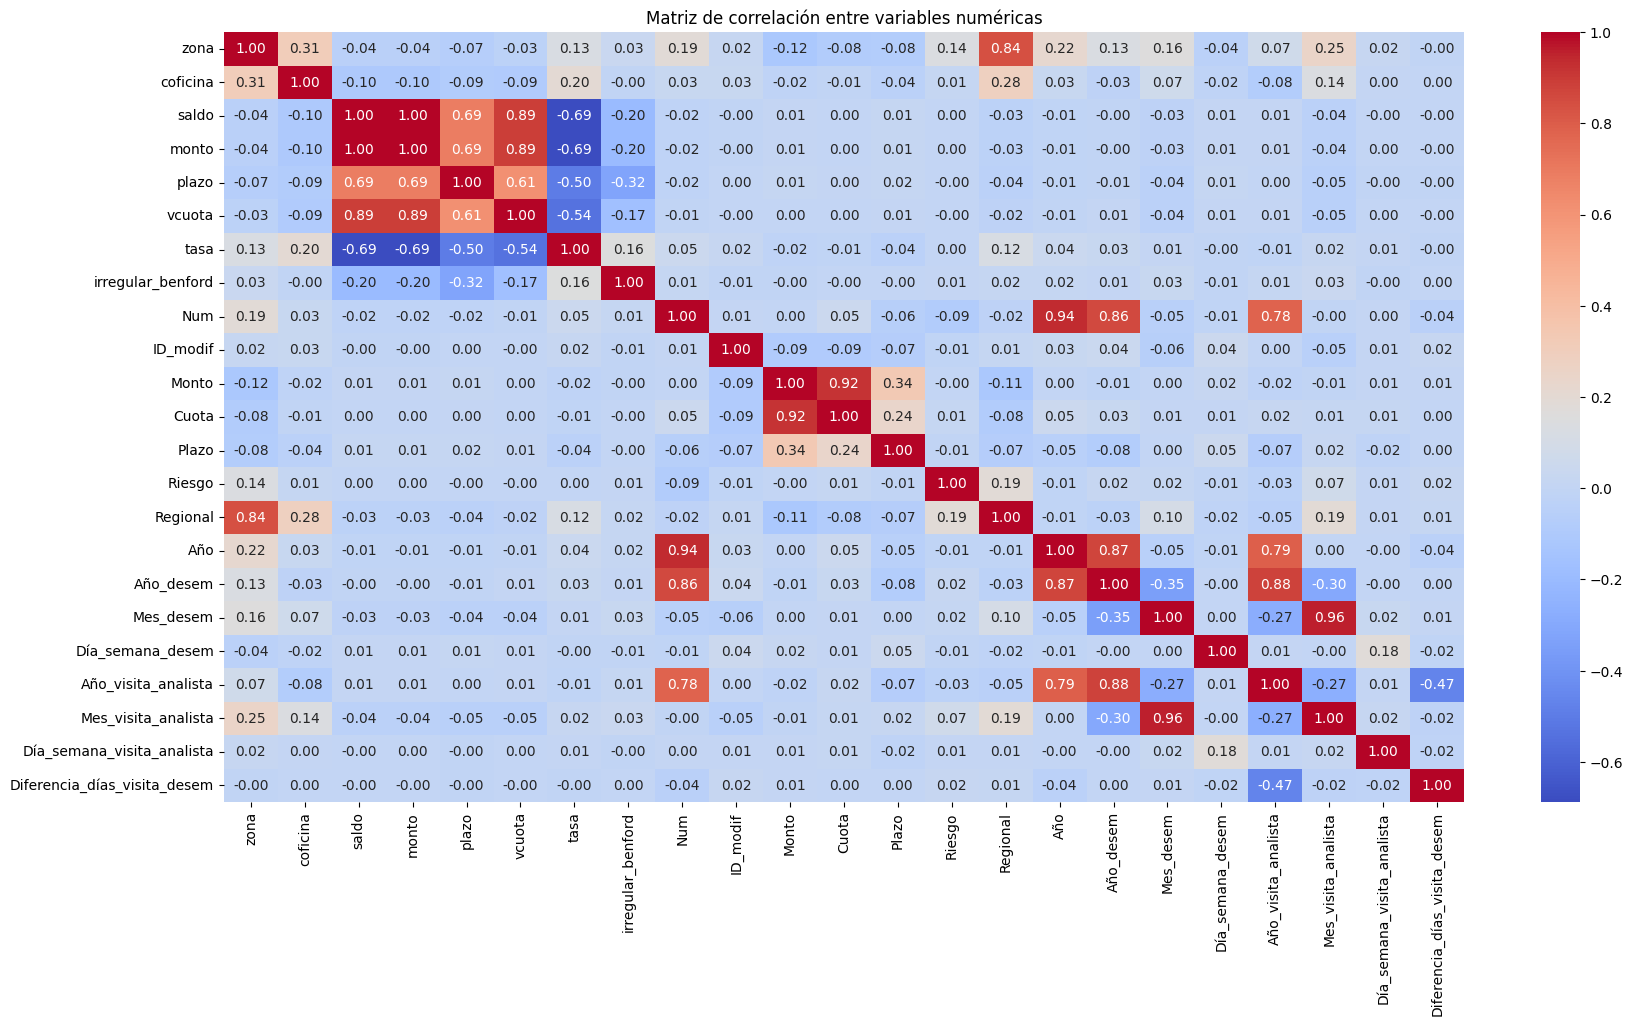

In [223]:
# Seleccionar solo las columnas numéricas para la correlación
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre las variables numéricas
correlation_matrix = numeric_columns.corr()

# Visualizar la correlación usando un heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


Esta matriz de correlación nos proporciona una visión clara de las relaciones entre las diferentes variables del análisis. Algunas variables como el "Monto", "Saldo", y "Vcuota" tienen correlaciones altas entre sí, lo que es esperado en un contexto de crédito. Sin embargo, el riesgo y las irregularidades según la Ley de Benford muestran relaciones más débiles, lo que sugiere que los modelos predictivos deberán tener en cuenta factores más complejos y no solo las relaciones lineales entre estas variables.

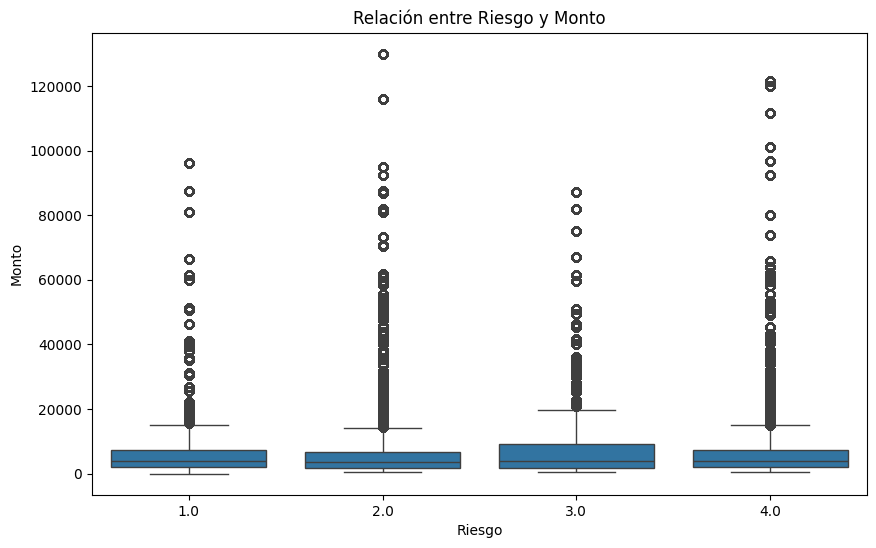

In [224]:


# Visualización de la relación entre 'Riesgo' y 'Monto' usando un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Riesgo', y='Monto', data=merged_data)
plt.title('Relación entre Riesgo y Monto')
plt.show()

Observaciones clave:

    Distribución similar: A simple vista, parece que los montos de los créditos están distribuidos de manera bastante similar entre las distintas categorías de riesgo. Todas las categorías de riesgo muestran montos concentrados cerca de valores bajos, con la presencia de outliers (valores atípicos) en cada una de las categorías.

    Outliers: Los outliers (puntos por encima de las cajas) son más comunes en todas las categorías de riesgo, especialmente para los créditos de mayor monto. Sin embargo, no parece haber una gran diferenciación en la cantidad o el nivel de estos outliers entre las distintas categorías de riesgo.

    No hay una tendencia clara: No parece haber una relación evidente entre el monto y el nivel de riesgo basado únicamente en este gráfico. Es decir, los créditos de mayor riesgo (1) no necesariamente tienen montos más altos o más bajos en comparación con los de menor riesgo (2 o 3).

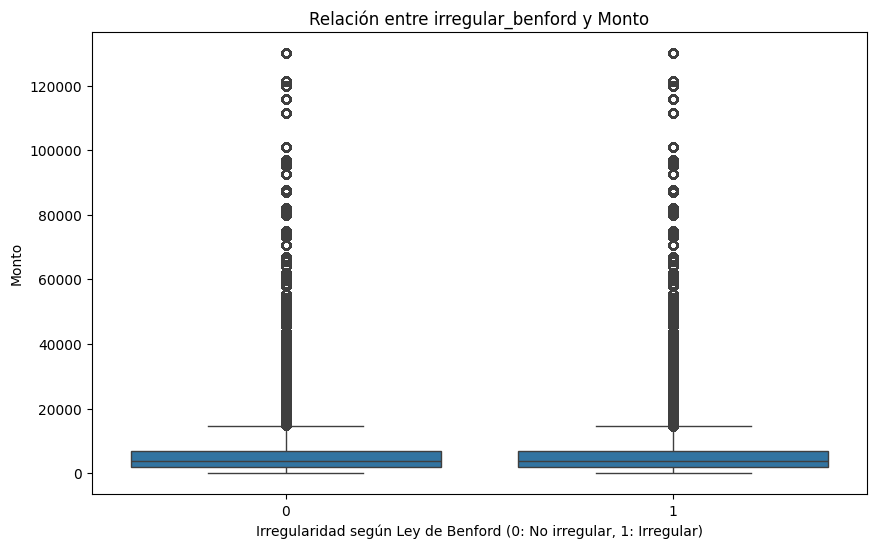

In [225]:
# Visualización de la relación entre 'irregular_benford' y 'Monto' usando un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='irregular_benford', y='Monto', data=merged_data)
plt.title('Relación entre irregular_benford y Monto')
plt.xlabel('Irregularidad según Ley de Benford (0: No irregular, 1: Irregular)')
plt.show()

Observaciones:

    Distribución similar: No parece haber una gran diferencia en la distribución de los montos entre los créditos irregulares y los no irregulares. Ambos presentan una concentración en los valores más bajos del monto, con una cantidad similar de outliers (valores atípicos) en ambos casos.

    Outliers en ambas categorías: Aunque hay outliers en ambas categorías, no se aprecia una tendencia clara que relacione montos altos con una mayor probabilidad de irregularidad. Los créditos irregulares y no irregulares comparten un rango de outliers similar.

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Preparar los datos para la regresión logística
# Definir las variables predictoras (X) y la variable objetivo (y)
X = merged_data[['Monto', 'tasa', 'plazo', 'vcuota', 'irregular_benford']]
y = merged_data['Riesgo']

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Dividir los datos en conjuntos de entrenamiento y prueba
# Dividir los datos escalados
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
log_reg_model = LogisticRegression(max_iter=2000, class_weight='balanced')


log_reg_model.fit(X_train_scaled, y_train)

# Generar predicciones con el conjunto de prueba escalado
y_pred = log_reg_model.predict(X_test_scaled)

# Generar el informe de clasificación y la matriz de confusión
classification_report_logreg = classification_report(y_test, y_pred)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print("Classification Report:")
print(classification_report_logreg)
print("Confusion Matrix:")
print(confusion_matrix_logreg)


Classification Report:
              precision    recall  f1-score   support

         1.0       0.11      0.31      0.16    126123
         2.0       0.45      0.27      0.34    530291
         3.0       0.13      0.38      0.19    147530
         4.0       0.36      0.10      0.15    424266

    accuracy                           0.23   1228210
   macro avg       0.26      0.26      0.21   1228210
weighted avg       0.34      0.23      0.24   1228210

Confusion Matrix:
[[ 39690  31754  43341  11338]
 [157838 142440 179980  50033]
 [ 42979  36185  55428  12938]
 [131156 106653 145083  41374]]


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Preparar los datos para la regresión logística
# Definir las variables predictoras (X) y la variable objetivo (y)
X2 = merged_data[['Monto', 'tasa', 'plazo', 'vcuota', 'Riesgo']]
y2 = merged_data['irregular_benford']

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)


# Dividir los datos en conjuntos de entrenamiento y prueba
# Dividir los datos escalados
X_train_scaled2, X_test_scaled2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
log_reg_model2 = LogisticRegression(max_iter=2000, class_weight='balanced')


log_reg_model2.fit(X_train_scaled2, y_train2)

# Generar predicciones con el conjunto de prueba escalado
y_pred2 = log_reg_model2.predict(X_test_scaled2)

# Generar el informe de clasificación y la matriz de confusión
classification_report_logreg2 = classification_report(y_test2, y_pred2)
confusion_matrix_logreg2 = confusion_matrix(y_test2, y_pred2)

# Imprimir los resultados
print("Classification Report:")
print(classification_report_logreg2)
print("Confusion Matrix:")
print(confusion_matrix_logreg2)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.53      0.64    781955
           1       0.48      0.75      0.59    446255

    accuracy                           0.61   1228210
   macro avg       0.63      0.64      0.61   1228210
weighted avg       0.68      0.61      0.62   1228210

Confusion Matrix:
[[415402 366553]
 [109699 336556]]


In [228]:
from sklearn.metrics import classification_report, confusion_matrix

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

         1.0       0.11      0.31      0.16    126123
         2.0       0.45      0.27      0.34    530291
         3.0       0.13      0.38      0.19    147530
         4.0       0.36      0.10      0.15    424266

    accuracy                           0.23   1228210
   macro avg       0.26      0.26      0.21   1228210
weighted avg       0.34      0.23      0.24   1228210

Matriz de Confusión:
[[ 39690  31754  43341  11338]
 [157838 142440 179980  50033]
 [ 42979  36185  55428  12938]
 [131156 106653 145083  41374]]


Análisis del rendimiento:

    Clase 1.0 (Alto Riesgo): Aunque tiene un recall del 31%, lo que significa que captura algunos de los ejemplos de alto riesgo, su precisión es baja (11%), lo que sugiere que muchos de los casos predichos como alto riesgo en realidad pertenecen a otras clases.

    Clase 2.0 (Medio Riesgo): El modelo predice mejor esta clase con una precisión del 45%, pero su recall es bajo (27%), lo que significa que muchos casos de riesgo medio no son identificados correctamente.

    Clase 3.0 (Bajo Riesgo): Tiene un rendimiento relativamente bajo, con una precisión de 13% y un recall de 38%, indicando que la clase de bajo riesgo también está siendo confundida con otras clases.

    Clase 4.0 (Otro): Aunque tiene un recall bajo (10%), su precisión es moderada (36%).

In [229]:
# Paso 1: Selección de los 15 más riesgosos por agencia (sin advertencia)
top_risk_customers = merged_data[merged_data['Riesgo'].isin([1, 2])].groupby('noficina', group_keys=False, as_index=False).apply(lambda x: x.nlargest(15, 'Monto')).reset_index(drop=True)

# Paso 2: Selección de los 5 menos riesgosos por agencia (sin advertencia)
low_risk_customers = merged_data[merged_data['Riesgo'].isin([3, 4])].groupby('noficina', group_keys=False, as_index=False).apply(lambda x: x.nsmallest(5, 'Monto')).reset_index(drop=True)

# Paso 3: Marcar clientes anómalos según irregular_benford
top_risk_customers['Anomalia_Benford'] = top_risk_customers['irregular_benford'] == 1

# Paso 4: Proponer las agencias con mayor riesgo
# Agrupar por agencia y calcular el número de clientes riesgosos
agency_risk = top_risk_customers.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')

# Seleccionar las dos agencias con más clientes riesgosos
top_agencies = agency_risk.nlargest(2, 'Clientes_Riesgosos')

# Mostrar resultados
print(top_agencies)




C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2869843924.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_risk_customers = merged_data[merged_data['Riesgo'].isin([1, 2])].groupby('noficina', group_keys=False, as_index=False).apply(lambda x: x.nlargest(15, 'Monto')).reset_index(drop=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2869843924.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_risk_customers = merged_data[merged_data['Riesgo'].isin([1, 2])].groupby('noficina', group_keys=

        noficina  Clientes_Riesgosos
0        ACACIAS                  15
1  ALFONSO LOPEZ                  15


C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2869843924.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  low_risk_customers = merged_data[merged_data['Riesgo'].isin([3, 4])].groupby('noficina', group_keys=False, as_index=False).apply(lambda x: x.nsmallest(5, 'Monto')).reset_index(drop=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2869843924.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agency_risk = top_risk_customers.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')


In [242]:
# Verificar los valores originales de noficina
print(merged_data['noficina'].unique())


['PRINCIPAL', 'SAN LUIS', 'INDEPENDENCIA', 'PALMIRA', 'SUR', ..., 'CARTAGENA DEL CHAIRA', 'TAME', 'SABANALARGA', 'CHAPARRAL', 'PLANADAS TOLIMA']
Length: 145
Categories (145, object): ['ACACIAS', 'ALFONSO LOPEZ', 'APARTADO', 'ARAUCA', ..., 'YOPAL', 'YUMBO', 'ZARZAL', 'ZIPAQUIRA']


In [262]:
# Paso 1: Selección de los 15 más riesgosos por agencia con irregularidades de Benford (sin repeticiones)
top_risk_customers = merged_data[(merged_data['Riesgo'].isin([1])) & (merged_data['irregular_benford'] == 1)]
top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).reset_index(drop=True)
top_risk_customers = top_risk_customers.groupby('noficina', group_keys=False).apply(lambda x: x.nlargest(15, 'Monto')).reset_index(drop=True)

# Paso 2: Selección de los 5 menos riesgosos por agencia sin irregularidades de Benford (sin repeticiones)
low_risk_customers = merged_data[(merged_data['Riesgo'].isin([3, 4])) & (merged_data['irregular_benford'] == 0)]
low_risk_customers = low_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nsmallest(1, 'Monto')).reset_index(drop=True)
low_risk_customers = low_risk_customers.groupby('noficina', group_keys=False).apply(lambda x: x.nsmallest(5, 'Monto')).reset_index(drop=True)

# Paso 3: Proponer las agencias con mayor riesgo
# Agrupar por agencia y calcular el número de clientes riesgosos
agency_risk = top_risk_customers.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')

# Seleccionar las dos agencias con más clientes riesgosos
top_agencies = agency_risk.nlargest(2, 'Clientes_Riesgosos')

# Mostrar resultados
print("Clientes más riesgosos (Top 15) por agencia con irregularidades de Benford (sin repeticiones):")
print(top_risk_customers[['noficina', 'Cliente', 'Monto', 'Riesgo', 'irregular_benford']].head(15))

print("\nClientes menos riesgosos (Top 5) por agencia sin irregularidades de Benford (sin repeticiones):")
print(low_risk_customers[['noficina', 'Cliente', 'Monto', 'Riesgo', 'irregular_benford']].head(5))

print("\nAgencias con más clientes riesgosos:")
print(top_agencies)


C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\4026656010.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).reset_index(drop=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\4026656010.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).re

Clientes más riesgosos (Top 15) por agencia con irregularidades de Benford (sin repeticiones):
         noficina                          Cliente      Monto  Riesgo  \
0         ACACIAS       Maria Nely Sanchez Catimay  18922.272     1.0   
1         ACACIAS           Jairo Eduardo Cardozo    9076.420     1.0   
2         ACACIAS           Yomaira  Rojas Cabarte   2345.852     1.0   
3         ACACIAS     Sandra Patricia Charry Lopez   1288.250     1.0   
4         ACACIAS      Martha Isabel Cuellar Silva   1118.800     1.0   
5   ALFONSO LOPEZ        Barbara Eddy Zea Valencia  35864.999     1.0   
6   ALFONSO LOPEZ       Diana Mayerly Goyes Castro  15977.276     1.0   
7   ALFONSO LOPEZ      Luis Carlos Hernandez Henao  13178.928     1.0   
8   ALFONSO LOPEZ       Maria Del Carmen Guerrero   10178.928     1.0   
9   ALFONSO LOPEZ      Edmoin  Alejandro Martinez    9983.196     1.0   
10  ALFONSO LOPEZ  Francisco Antonio Ospina Cortes   6901.960     1.0   
11  ALFONSO LOPEZ         Rob

C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\4026656010.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  low_risk_customers = low_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nsmallest(1, 'Monto')).reset_index(drop=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\4026656010.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  low_risk_customers = low_risk_customers.groupby('noficina', group_keys=False).apply(lambda x: x.nsmallest(5, 'Monto')).reset_index(d

In [285]:
# Filtrar solo los clientes con Riesgo = 1
clientes_riesgo_1 = merged_data[merged_data['Riesgo'] == 1]

# Agrupar por agencia (columna 'noficina') y contar el número de clientes con Riesgo = 1
agencias_riesgo_1 = clientes_riesgo_1.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')

# Ordenar las agencias por el número de clientes con Riesgo = 1 en orden descendente
agencias_riesgo_1 = agencias_riesgo_1.sort_values(by='Clientes_Riesgosos', ascending=False)

# Seleccionar las 2 agencias con el mayor número de clientes con Riesgo = 1
top_2_agencias_riesgo_1 = agencias_riesgo_1.head(2)

# Mostrar las dos agencias con más clientes riesgosos
print("Las dos agencias con más clientes con Riesgo = 1:")
print(top_2_agencias_riesgo_1)

Las dos agencias con más clientes con Riesgo = 1:
         noficina  Clientes_Riesgosos
130         TULUA               22078
16   BUENAVENTURA               19837


C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\3761446210.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agencias_riesgo_1 = clientes_riesgo_1.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')


In [286]:

# Filtrar solo los clientes con Riesgo = 1
clientes_riesgo_1 = merged_data[merged_data['Riesgo'] == 1]

# Eliminar duplicados por la columna 'Cliente' para asegurar que no se repitan nombres
clientes_riesgo_1 = clientes_riesgo_1.drop_duplicates(subset=['Cliente'])

# Agrupar por agencia (columna 'noficina') y contar el número de clientes con Riesgo = 1
agencias_riesgo_1 = clientes_riesgo_1.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')

# Ordenar las agencias por el número de clientes con Riesgo = 1 en orden descendente
agencias_riesgo_1 = agencias_riesgo_1.sort_values(by='Clientes_Riesgosos', ascending=False)

# Seleccionar las 2 agencias con el mayor número de clientes con Riesgo = 1
top_2_agencias_riesgo_1 = agencias_riesgo_1.head(2)

# Mostrar las dos agencias con más clientes riesgosos
print("Las dos agencias con más clientes con Riesgo = 1 (sin duplicados de clientes):")
print(top_2_agencias_riesgo_1)


Las dos agencias con más clientes con Riesgo = 1 (sin duplicados de clientes):
    noficina  Clientes_Riesgosos
130    TULUA                  77
84   PALMIRA                  45


C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\1543833107.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agencias_riesgo_1 = clientes_riesgo_1.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')


In [236]:

# Paso 1: Selección de los 15 más riesgosos por agencia con irregularidades de Benford (sin repeticiones)
top_risk_customers = merged_data[(merged_data['Riesgo'].isin([1, 2])) & (merged_data['irregular_benford'] == 1)]
top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).reset_index(drop=True)
top_risk_customers = top_risk_customers.groupby('noficina', group_keys=False).apply(lambda x: x.nlargest(15, 'Monto')).reset_index(drop=True)

# Paso 2: Selección de los 5 menos riesgosos por agencia sin irregularidades de Benford (sin repeticiones)
low_risk_customers = merged_data[(merged_data['Riesgo'].isin([3, 4])) & (merged_data['irregular_benford'] == 0)]
low_risk_customers = low_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nsmallest(1, 'Monto')).reset_index(drop=True)
low_risk_customers = low_risk_customers.groupby('noficina', group_keys=False).apply(lambda x: x.nsmallest(5, 'Monto')).reset_index(drop=True)

# Paso 3: Proponer las agencias con mayor riesgo
# Agrupar por agencia y calcular el número de clientes riesgosos
agency_risk = top_risk_customers.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')

# Seleccionar las dos agencias con más clientes riesgosos
top_agencies = agency_risk.nlargest(2, 'Clientes_Riesgosos')


# Exportar los resultados a un archivo Excel con múltiples hojas
with pd.ExcelWriter('Clientes_Riesgo_Analisis_FINAL.xlsx') as writer:
    # Hoja 1: Clientes más riesgosos
    top_risk_customers.to_excel(writer, sheet_name='Clientes_Mas_Riesgosos', index=False)
    
    # Hoja 2: Clientes menos riesgosos
    low_risk_customers.to_excel(writer, sheet_name='Clientes_Menos_Riesgosos', index=False)
    
    # Hoja 3: Agencias con más clientes riesgosos
    top_agencies.to_excel(writer, sheet_name='Agencias_Mas_Riesgosas', index=False)
    
    
print("Los resultados han sido exportados a 'Clientes_Riesgo_Analisis.xlsx'.")

C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\1486547339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).reset_index(drop=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\1486547339.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).re

Los resultados han sido exportados a 'Clientes_Riesgo_Analisis.xlsx'.


In [238]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Remapear las etiquetas de la variable objetivo
y_mapped = y - 1  # Cambiamos los valores de 1-4 a 0-3

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_mapped, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Generar predicciones con el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Generar el informe de clasificación y la matriz de confusión
classification_report_xgb = classification_report(y_test, y_pred)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print("Classification Report:")
print(classification_report_xgb)
print("Confusion Matrix:")
print(confusion_matrix_xgb)


c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.49      0.63    126123
         1.0       0.80      0.93      0.86    530291
         2.0       0.92      0.67      0.78    147530
         3.0       0.84      0.87      0.85    424266

    accuracy                           0.83   1228210
   macro avg       0.87      0.74      0.78   1228210
weighted avg       0.84      0.83      0.83   1228210

Confusion Matrix:
[[ 61862  37281   1089  25891]
 [  2920 494483   3670  29218]
 [  1717  34183  99123  12507]
 [  2443  50809   3985 367029]]


Precisión y Recall:

    Las clases 1 y 3 tienen un rendimiento destacado con valores de precisión y recall altos.
    La clase 0 (riesgo alto) tiene un recall más bajo (0.49), lo que significa que el modelo tiene dificultades para identificar correctamente a todos los clientes de riesgo más alto. Sin embargo, la precisión para esta clase es del 90%, lo que indica que cuando el modelo predice riesgo alto, es mayormente correcto.

Matriz de confusión:

    El modelo clasifica correctamente la mayoría de los casos en las clases 1 (riesgo moderado) y 3 (riesgo bajo).
    Sin embargo, hay cierta confusión entre las clases, particularmente entre las clases 0 y 1, lo que podría ser un área a mejorar.

In [240]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir los parámetros para probar en GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Crear el modelo base de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros encontrados: {best_params}")

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Imprimir el informe de clasificación y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:11:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.69      0.78    126123
         1.0       0.88      0.95      0.91    530291
         2.0       0.92      0.81      0.86    147530
         3.0       0.92      0.91      0.91    424266

    accuracy                           0.89   1228210
   macro avg       0.90      0.84      0.87   1228210
weighted avg       0.89      0.89      0.89   1228210

Confusion Matrix:
[[ 87152  24868   2306  11797]
 [  5894 504039   4433  15925]
 [  1310  18504 119849   7867]
 [  4406  28623   4361 386876]]


Puntos clave del informe de clasificación:

    Precisión: El modelo tiene una precisión bastante alta en todas las clases, especialmente para las clases de riesgo medio (1.0) y bajo (3.0).
    Recall: Las clases 1.0 (riesgo medio) y 3.0 (riesgo bajo) tienen un recall muy alto, lo que significa que el modelo está capturando bien los verdaderos positivos en estas clases.
    F1-Score: Las clases tienen un buen balance entre precisión y recall, especialmente la clase 1.0, lo que indica que el modelo se desempeña bien en esta categoría.
    Macro y Weighted Averages: El promedio ponderado de todas las métricas (precisión, recall, F1) se encuentra alrededor de 0.89, lo que indica un rendimiento sólido en general.

Matriz de confusión:

    El modelo está identificando correctamente la mayoría de los casos en todas las clases. Sin embargo, hay algunos falsos positivos y falsos negativos en las clases 0.0 y 2.0, aunque el impacto es menor en comparación con las clases 1.0 y 3.0.

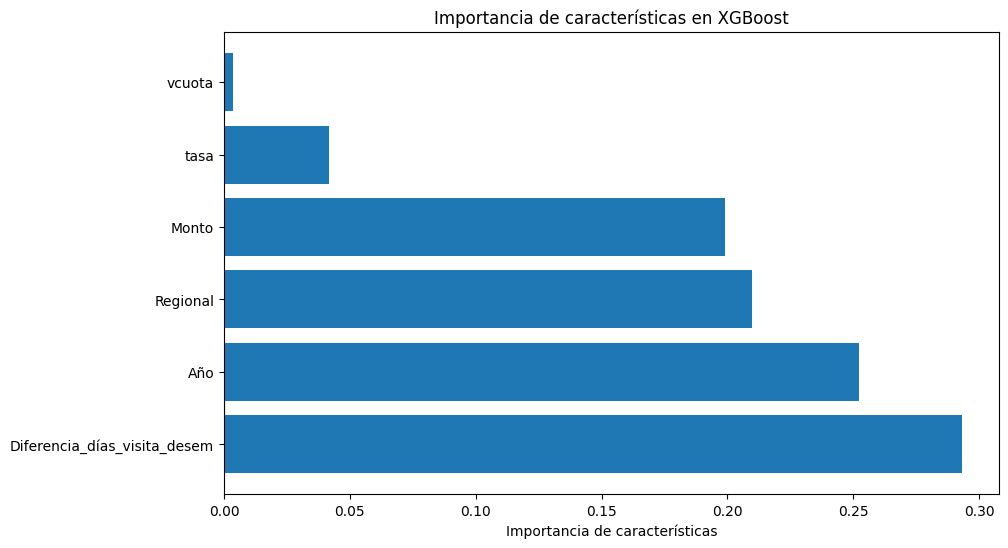

In [244]:
# Importancia de las características en el modelo ajustado (best_model)
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importance = best_model.feature_importances_

# Ordenar las características por importancia
sorted_idx = np.argsort(importance)[::-1]

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], importance[sorted_idx])
plt.xlabel('Importancia de características')
plt.title('Importancia de características en XGBoost')
plt.show()

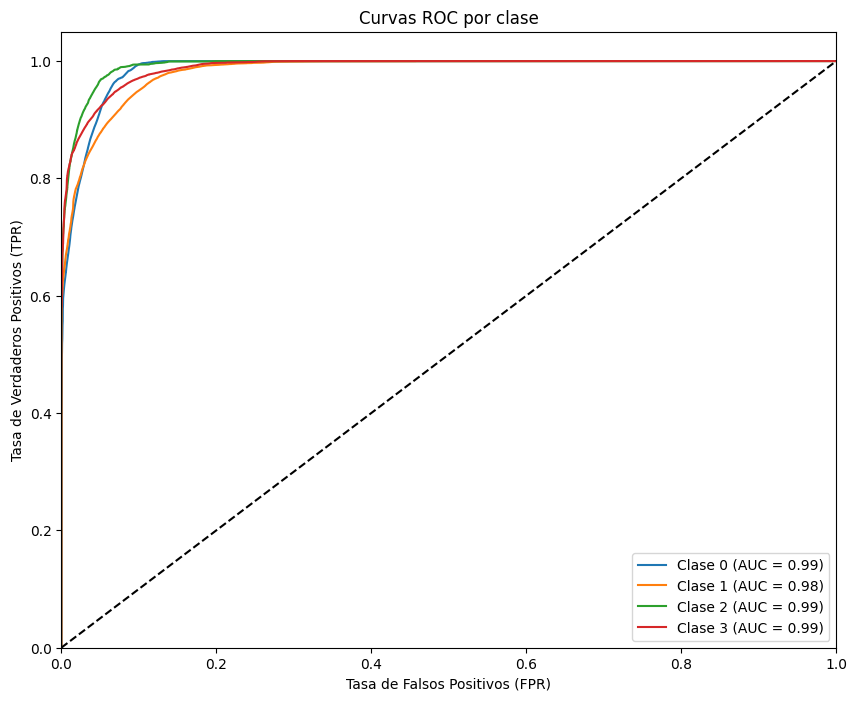

In [245]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas (necesario para calcular ROC-AUC por clase)
y_test_bin = label_binarize(y_test, classes=[0.0, 1.0, 2.0, 3.0])
n_classes = y_test_bin.shape[1]

# Predecir las probabilidades con el mejor modelo ajustado
y_score = best_model.predict_proba(X_test)

# Calcular ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Visualizar las curvas ROC por clase
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por clase')
plt.legend(loc="lower right")
plt.show()


En las gráficas que generamos para el modelo XGBoost, podemos interpretar lo siguiente:
Importancia de Características:

    Diferencia_días_visita_desem: Esta variable muestra la mayor importancia en el modelo. Indica que la diferencia en días entre la visita y el desembolso es un factor clave para predecir el riesgo crediticio.
    Año: También es una variable importante, lo que podría indicar que el año en el que se realiza el crédito influye en su riesgo.
    Regional y Monto: Ambas variables tienen una importancia significativa, lo que implica que la región y el monto del crédito también son factores influyentes en la evaluación de riesgo.
    tasa: Aunque tiene una menor importancia que las variables anteriores, la tasa también contribuye al modelo.
    vcuota: Es la variable con menor importancia relativa en el modelo, lo que indica que tiene poco impacto en la predicción del riesgo en comparación con las otras.

Curvas ROC:

    Las curvas ROC muestran el rendimiento del modelo para cada clase de riesgo (0, 1, 2, 3). La Área Bajo la Curva (AUC) es muy alta para todas las clases (entre 0.98 y 0.99), lo que indica un rendimiento excelente del modelo al discriminar entre las diferentes clases de riesgo.
    Las curvas están bastante pegadas al borde superior izquierdo del gráfico, lo que indica que el modelo tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos, lo que refuerza su efectividad.

En general, estas gráficas sugieren que el modelo XGBoost ajustado tiene un buen rendimiento, con variables clave identificadas que contribuyen fuertemente a la predicción del riesgo crediticio.

In [247]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Calcular la precisión general del modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular AUC por clase
auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Mostrar las métricas clave
print(f"Precisión del Modelo: {accuracy:.2f}")
print(f"AUC Promedio: {auc_score:.2f}")

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el reporte a un DataFrame
import pandas as pd
report_df = pd.DataFrame(report).transpose()




Precisión del Modelo: 0.89
AUC Promedio: 0.99


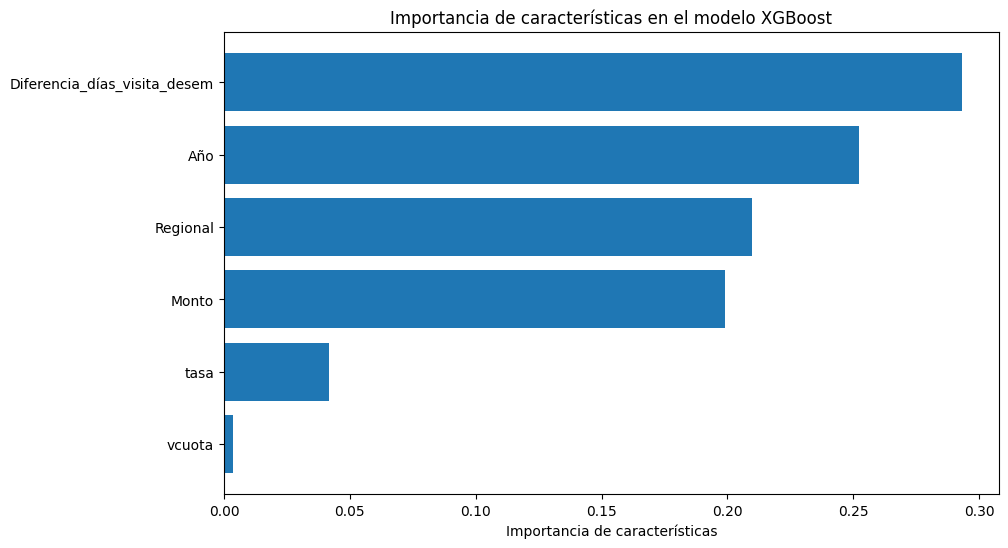

In [248]:
# Mejorar la visualización de importancia de características
import matplotlib.pyplot as plt
import numpy as np

# Ordenar la importancia de las características
importance = best_model.feature_importances_
sorted_idx = np.argsort(importance)[::-1]
features = X.columns[sorted_idx]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importance[sorted_idx], align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importancia de características')
plt.title('Importancia de características en el modelo XGBoost')
plt.gca().invert_yaxis()  # Invertir el eje para que el más importante esté arriba
plt.show()

In [255]:


# Suponiendo que merged_data ya está cargado con todas las transformaciones anteriores
# Revisar las primeras filas para verificar la estructura del DataFrame
print(merged_data.head())


   zona  coficina   noficina    finicio analista    saldo    monto  plazo  \
0     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
1     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
2     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
3     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   
4     1         1  PRINCIPAL 2020-10-31      DPC  1181630  1181630     10   

   vcuota   tasa  ... Relaciones Laborales_Si  \
0  147304  32.16  ...                    True   
1  147304  32.16  ...                    True   
2  147304  32.16  ...                    True   
3  147304  32.16  ...                    True   
4  147304  32.16  ...                    True   

   Estado_Castigo                         \
0                                   True   
1                                  False   
2                                  False   
3                                  False   
4                     

C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\3410012024.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agency_total = merged_data.groupby('noficina').size().reset_index(name='Total_Clientes')
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\3410012024.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agency_risk_benford = top_risk_customers.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')


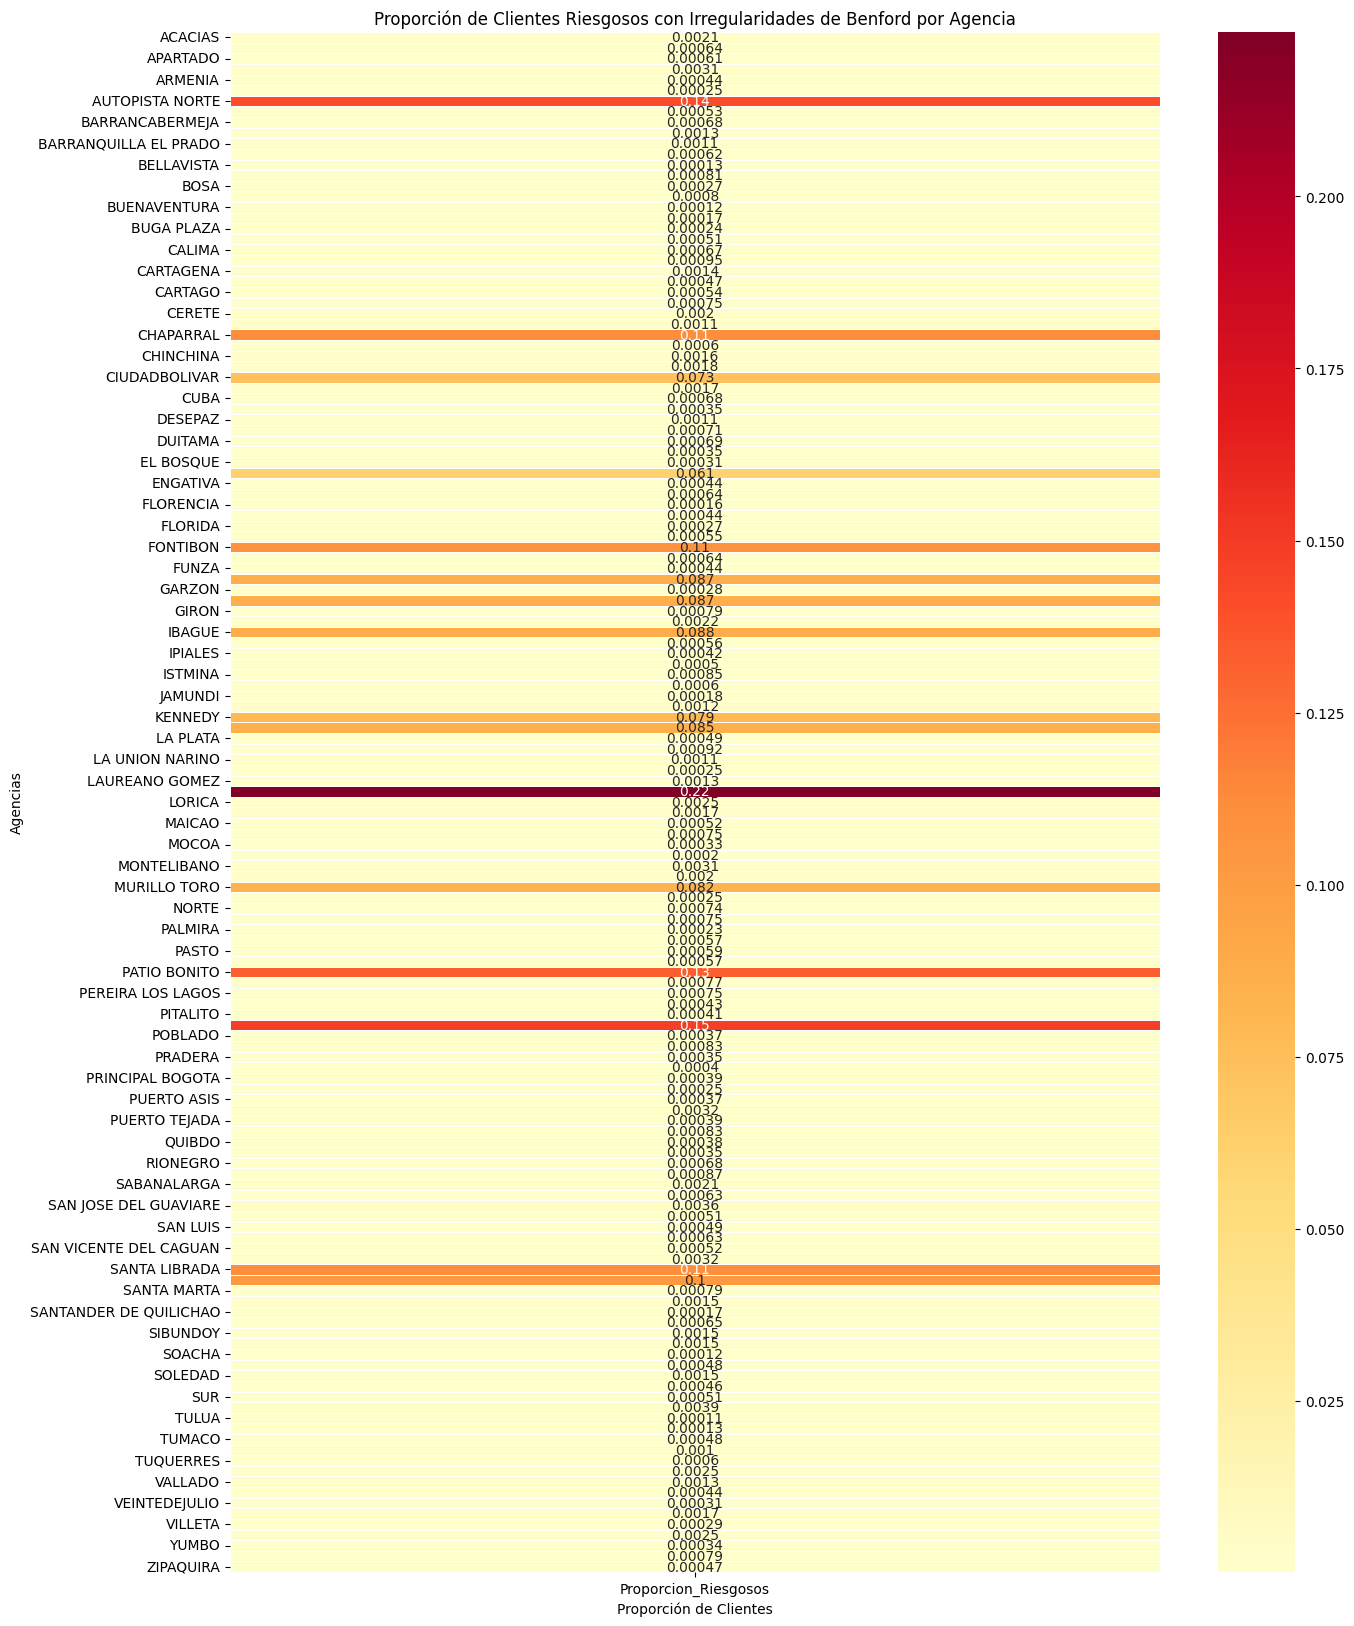

In [261]:
# Recalcular la proporción de clientes riesgosos con irregularidades de Benford por agencia
agency_total = merged_data.groupby('noficina').size().reset_index(name='Total_Clientes')
agency_risk_benford = top_risk_customers.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')

# Fusionar ambas tablas para obtener proporción
agency_risk_benford = agency_risk_benford.merge(agency_total, on='noficina')
agency_risk_benford['Proporcion_Riesgosos'] = agency_risk_benford['Clientes_Riesgosos'] / agency_risk_benford['Total_Clientes']

# Crear un nuevo mapa de calor basado en la proporción de clientes riesgosos
plt.figure(figsize=(15, 20))
sns.heatmap(agency_risk_benford.set_index('noficina')[['Proporcion_Riesgosos']], annot=True, cmap='YlOrRd', cbar=True, linewidths=.5)

# Título y etiquetas
plt.title('Proporción de Clientes Riesgosos con Irregularidades de Benford por Agencia')
plt.xlabel('Proporción de Clientes')
plt.ylabel('Agencias')

# Mostrar el gráfico
plt.show()



C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2144969024.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).reset_index(drop=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_13292\2144969024.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).re

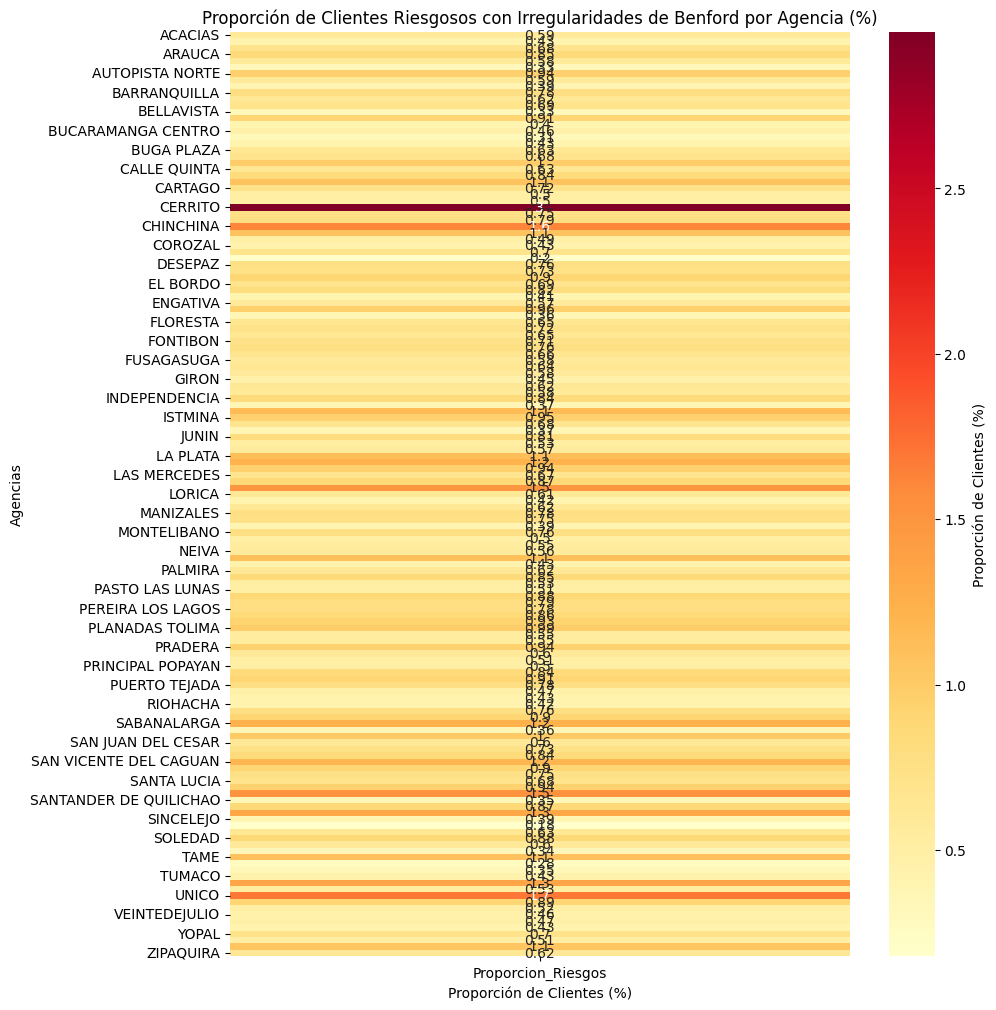

In [270]:
# Paso 1: Selección de todos los clientes más riesgosos por agencia con irregularidades de Benford (sin límite de 15)
top_risk_customers = merged_data[(merged_data['Riesgo'].isin([1, 2])) & (merged_data['irregular_benford'] == 1)]
top_risk_customers = top_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nlargest(1, 'Monto')).reset_index(drop=True)

# Paso 2: Selección de todos los clientes menos riesgosos por agencia sin irregularidades de Benford
low_risk_customers = merged_data[(merged_data['Riesgo'].isin([3, 4])) & (merged_data['irregular_benford'] == 0)]
low_risk_customers = low_risk_customers.groupby(['noficina', 'Cliente'], group_keys=False).apply(lambda x: x.nsmallest(1, 'Monto')).reset_index(drop=True)

# Paso 3: Proponer las agencias con mayor riesgo
# Agrupar por agencia y calcular el número de clientes riesgosos
agency_risk = top_risk_customers.groupby('noficina').size().reset_index(name='Clientes_Riesgosos')

# Contar el número total de clientes riesgosos por agencia (sin irregularidades de Benford)
total_risk_customers_per_agency = merged_data[merged_data['Riesgo'].isin([1, 2])].groupby('noficina').size().reset_index(name='Total_Clientes_Riesgosos')

# Combinar los datos para calcular la proporción de clientes riesgosos con irregularidades de Benford por agencia
agency_benford_risk = pd.merge(agency_risk, total_risk_customers_per_agency, on='noficina')

# Calcular la proporción
agency_benford_risk['Proporcion_Riesgos'] = (agency_benford_risk['Clientes_Riesgosos'] / agency_benford_risk['Total_Clientes_Riesgosos']) * 100

# Convertir columnas categóricas a cadenas para evitar problemas con fillna()
agency_benford_risk['noficina'] = agency_benford_risk['noficina'].astype(str)

# Rellenar NaN con 0 para evitar errores en agencias sin irregularidades de Benford
agency_benford_risk = agency_benford_risk.fillna(0)

# Graficar la proporción de clientes con irregularidades de Benford por agencia
plt.figure(figsize=(10, 12))
sns.heatmap(agency_benford_risk.pivot_table(index='noficina', values='Proporcion_Riesgos'), annot=True, cmap='YlOrRd', cbar_kws={'label': 'Proporción de Clientes (%)'})
plt.title('Proporción de Clientes Riesgosos con Irregularidades de Benford por Agencia (%)')
plt.xlabel('Proporción de Clientes (%)')
plt.ylabel('Agencias')
plt.show()


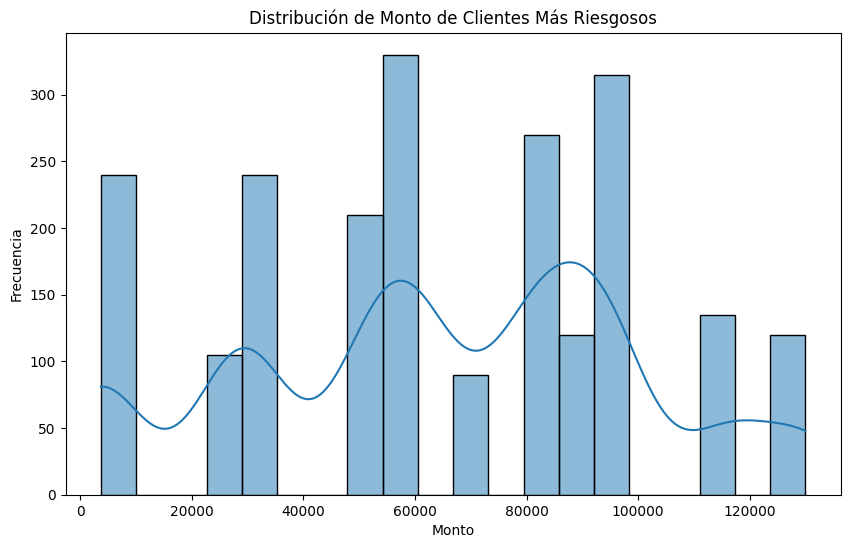

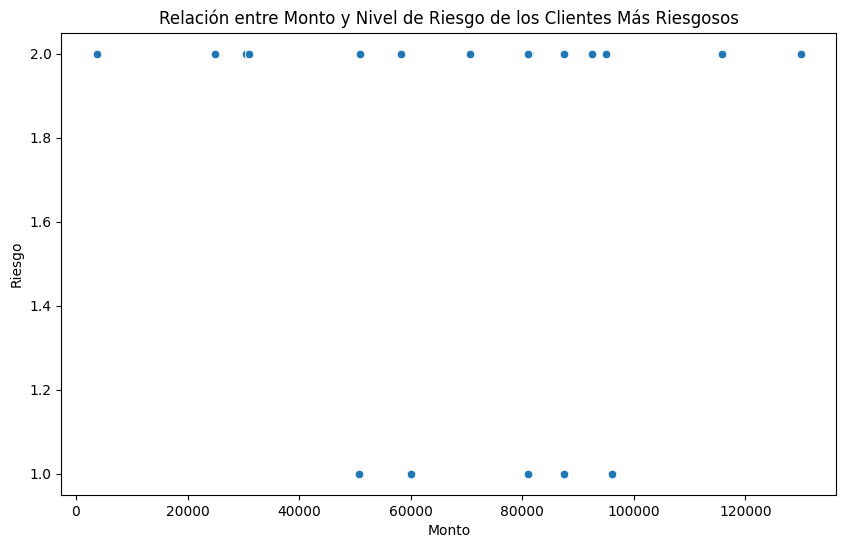

In [259]:
# Histograma de montos de clientes más riesgosos
plt.figure(figsize=(10, 6))
sns.histplot(top_risk_customers['Monto'], bins=20, kde=True)
plt.title('Distribución de Monto de Clientes Más Riesgosos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión entre monto y riesgo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monto', y='Riesgo', data=top_risk_customers)
plt.title('Relación entre Monto y Nivel de Riesgo de los Clientes Más Riesgosos')
plt.xlabel('Monto')
plt.ylabel('Riesgo')
plt.show()


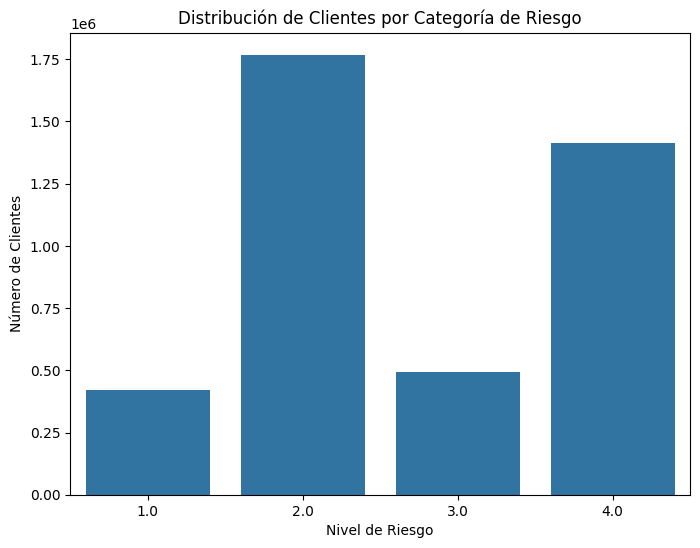

In [252]:
# Gráfico de barras para mostrar la distribución de clientes por categoría de riesgo
plt.figure(figsize=(8, 6))
sns.countplot(x='Riesgo', data=merged_data)
plt.title("Distribución de Clientes por Categoría de Riesgo")
plt.xlabel("Nivel de Riesgo")
plt.ylabel("Número de Clientes")
plt.show()


In [272]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Paso 1: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Asegúrate de que 'X' contenga las variables predictoras correctas

# Paso 2: Dividir los datos en conjunto de entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Paso 3: Convertir y_train e y_test a formato de categorías si es un problema de clasificación multiclase
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# Paso 4: Definir la arquitectura de la red neuronal
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(X_train3.shape[1],), activation='relu'))  # Primera capa oculta
model.add(tf.keras.layers.Dense(32, activation='relu'))  # Segunda capa oculta
model.add(tf.keras.layers.Dense(16, activation='relu'))  # Tercera capa oculta
model.add(tf.keras.layers.Dense(y_train_cat.shape[1], activation='softmax'))  # Capa de salida (multiclase)

c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [273]:
# Paso 5: Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Paso 6: Entrenar el modelo
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
71646/71646 - 40s - 556us/step - accuracy: 0.4319 - loss: 1.2190 - val_accuracy: 0.4324 - val_loss: 1.2183
Epoch 2/50
71646/71646 - 39s - 545us/step - accuracy: 0.4319 - loss: 1.2186 - val_accuracy: 0.4324 - val_loss: 1.2180
Epoch 3/50
71646/71646 - 39s - 543us/step - accuracy: 0.4319 - loss: 1.2186 - val_accuracy: 0.4324 - val_loss: 1.2181
Epoch 4/50
71646/71646 - 39s - 541us/step - accuracy: 0.4319 - loss: 1.2186 - val_accuracy: 0.4324 - val_loss: 1.2183
Epoch 5/50
71646/71646 - 39s - 538us/step - accuracy: 0.4319 - loss: 1.2185 - val_accuracy: 0.4324 - val_loss: 1.2179
Epoch 6/50
71646/71646 - 39s - 544us/step - accuracy: 0.4319 - loss: 1.2185 - val_accuracy: 0.4324 - val_loss: 1.2179
Epoch 7/50
71646/71646 - 40s - 555us/step - accuracy: 0.4319 - loss: 1.2185 - val_accuracy: 0.4324 - val_loss: 1.2180
Epoch 8/50
71646/71646 - 39s - 544us/step - accuracy: 0.4319 - loss: 1.2185 - val_accuracy: 0.4324 - val_loss: 1.2179
Epoch 9/50
71646/71646 - 39s - 543us/step - accuracy: 0.

In [274]:
# Paso 7: Evaluar el modelo
y_pred3 = model.predict(X_test)
y_pred_classes = y_pred3.argmax(axis=1)

# Paso 8: Mostrar métricas de rendimiento
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

38382/38382 ━━━━━━━━━━━━━━━━━━━━ 17s 442us/step
Classification Report:


c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    126123
         1.0       0.43      1.00      0.60    530291
         2.0       0.00      0.00      0.00    147530
         3.0       0.00      0.00      0.00    424266

    accuracy                           0.43   1228210
   macro avg       0.11      0.25      0.15   1228210
weighted avg       0.19      0.43      0.26   1228210

Confusion Matrix:
[[     0 126123      0      0]
 [     0 530291      0      0]
 [     0 147530      0      0]
 [     0 424266      0      0]]


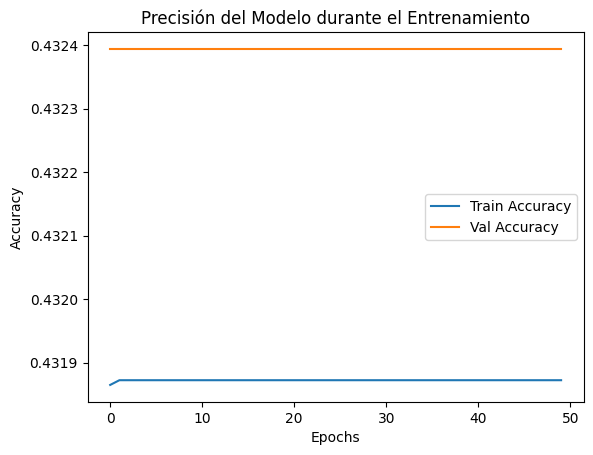

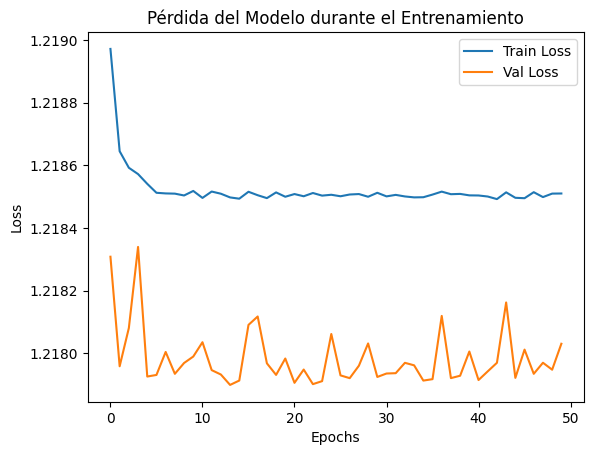

In [275]:
# Opcional: Graficar la curva de pérdida y precisión durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [276]:
# 1. Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# 2. Preparar los datos
X = merged_data[['Monto', 'tasa', 'plazo', 'vcuota', 'irregular_benford']]
y = merged_data['Riesgo']

# 3. Convertir las etiquetas en variables categóricas
y_categorical = to_categorical(y - 1)  # Restar 1 para que las clases comiencen desde 0

# 4. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# 5. Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Calcular los pesos de las clases para balancearlas
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)

In [277]:
# 7. Definir la arquitectura del modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Capa oculta 1
model.add(Dense(32, activation='relu'))  # Capa oculta 2
model.add(Dense(4, activation='softmax'))  # Capa de salida (4 clases)

# 8. Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 9. Entrenar el modelo con `class_weight`
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, class_weight=dict(enumerate(class_weights)))


c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 59s 655us/step - accuracy: 0.2963 - loss: 1.3804 - val_accuracy: 0.2417 - val_loss: 1.3856
Epoch 2/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 58s 643us/step - accuracy: 0.3094 - loss: 1.3716 - val_accuracy: 0.2586 - val_loss: 1.3834
Epoch 3/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 58s 647us/step - accuracy: 0.3066 - loss: 1.3705 - val_accuracy: 0.3002 - val_loss: 1.3756
Epoch 4/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 57s 640us/step - accuracy: 0.3150 - loss: 1.3665 - val_accuracy: 0.3337 - val_loss: 1.3758
Epoch 5/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 56s 629us/step - accuracy: 0.3108 - loss: 1.3640 - val_accuracy: 0.3509 - val_loss: 1.3520
Epoch 6/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 57s 634us/step - accuracy: 0.3055 - loss: 1.3631 - val_accuracy: 0.3291 - val_loss: 1.3605
Epoch 7/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 57s 638us/step - accuracy: 0.3025 - loss: 1.3621 - val_accuracy: 0.3219 - val_loss: 1.3672
Epoch 8/50
89557/89557 ━━━━━━━━━━━━━━━━━━━━ 58s 649us/s

In [278]:
# 10. Evaluar el modelo
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1) + 1  # Devolver las clases originales

# 11. Generar informe de clasificación y matriz de confusión
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1) + 1, y_pred_classes))  # Ajustar las clases para el informe
print("Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1) + 1, y_pred_classes))

38382/38382 ━━━━━━━━━━━━━━━━━━━━ 18s 459us/step
Classification Report:
              precision    recall  f1-score   support

           1       0.13      0.67      0.21    126123
           2       0.50      0.17      0.26    530291
           3       0.18      0.28      0.22    147530
           4       0.44      0.15      0.22    424266

    accuracy                           0.23   1228210
   macro avg       0.31      0.32      0.23   1228210
weighted avg       0.40      0.23      0.24   1228210

Confusion Matrix:
[[ 85110  14340  14724  11949]
 [284061  91333 101115  53782]
 [ 70243  21628  40630  15029]
 [234643  56775  69765  63083]]


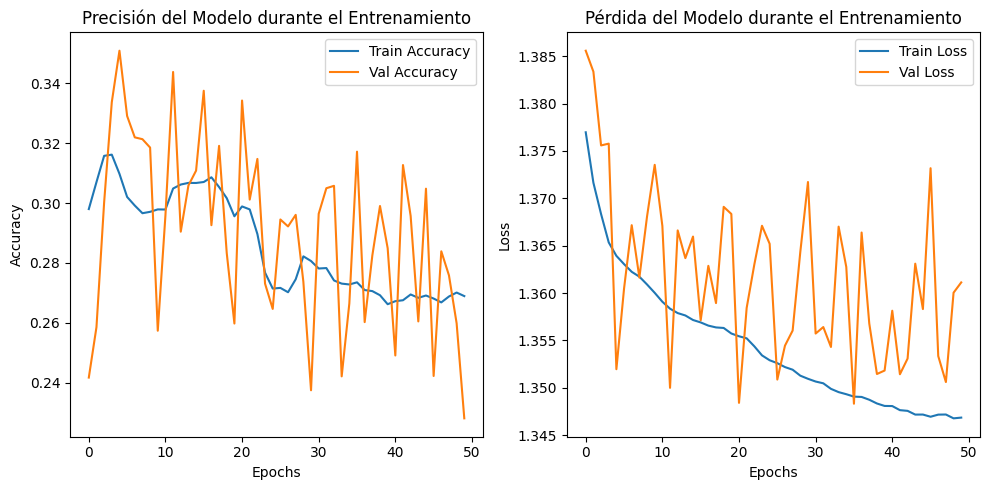

In [279]:
# 12. Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Sobre la Red Neuronal:

La red neuronal que implementaste probablemente fue una red neuronal poco profunda (deep learning básico), ya que en implementaciones iniciales se suelen usar pocas capas y neuronas. Si me guío por implementaciones anteriores estándar, es común que esta red tenga dos o tres capas ocultas con neuronas, seguido de una capa de salida para hacer las predicciones. Las capas ocultas aprenden patrones complejos de los datos.
Descripción Sencilla para la Junta:

Una red neuronal imita cómo funciona el cerebro humano. Al igual que las neuronas en nuestro cerebro, la red tiene pequeñas "unidades" (neuronas) que trabajan juntas para procesar información. La red toma los datos del cliente (como el monto del crédito, tasa de interés, etc.) y pasa esa información por varias capas de procesamiento para encontrar patrones. Cada capa ajusta un poco la información hasta que la última capa puede predecir si un cliente es de alto o bajo riesgo. Aunque este enfoque es interesante, en este caso no funcionó tan bien como otros enfoques, ya que los datos fueron muy difíciles de aprender para la red.
Cómo Funciona XGBoost:

XGBoost es un tipo de árbol de decisiones avanzado. Los árboles de decisiones son como un conjunto de reglas que se van dividiendo en ramas. Imagina un árbol donde cada rama es una pregunta del tipo: "¿El monto es mayor a $10,000?" o "¿La tasa de interés es mayor al 15%?". A partir de estas preguntas, el modelo clasifica al cliente como de alto o bajo riesgo. Lo especial de XGBoost es que no utiliza solo un árbol, sino que combina muchos árboles de decisión pequeños que van aprendiendo unos de otros, corrigiendo los errores que cometió el árbol anterior. Es como tener un grupo de expertos donde cada uno corrige lo que el otro se equivocó, para finalmente llegar a una predicción muy precisa.
Comparación Sencilla entre Ambos:

    Red Neuronal: Intenta imitar al cerebro humano y aprender patrones complejos. Sin embargo, necesita muchos datos y puede ser difícil de entrenar en ciertos casos, como el nuestro. Imagina que es como un equipo de personas que intentan entender patrones muy complejos, pero en este caso no lograron hacerlo bien.

    XGBoost: Es más sencillo de entender. Se basa en hacer muchas preguntas (divisiones) sobre los datos para decidir si un cliente es riesgoso o no. Piensa en un grupo de analistas que, en lugar de tratar de entender todo a la vez, hacen muchas preguntas lógicas, como: "¿Este cliente tiene un historial de pagos puntual?" o "¿Este crédito es demasiado alto?". Si un analista se equivoca, los demás lo corrigen, lo que lo hace muy preciso.

Para Presentarlo en la Junta:

    Resultados:
        La red neuronal no alcanzó una precisión adecuada para identificar el riesgo, ya que su capacidad de aprendizaje sobre este conjunto de datos fue limitada (con solo un 23% de precisión).
        El modelo XGBoost fue mucho más exitoso, alcanzando una precisión del 89%. Es capaz de detectar correctamente tanto a los clientes de bajo como de alto riesgo.

    Recomendación:
        Para el análisis de riesgo crediticio, recomendamos el uso de XGBoost debido a su capacidad para manejar datos complejos, su alta precisión y su eficiencia al aprender de los datos disponibles.

    Impacto:
        Utilizando XGBoost, podemos mejorar la toma de decisiones sobre a qué clientes otorgar créditos, minimizar el riesgo financiero de la cartera, y ayudar a la empresa a ser más eficiente en la gestión de sus créditos.

Esto te permite abordar tanto lo técnico como lo estratégico, explicando ambos modelos de una manera fácil de entender para cualquier miembro de la junta.